# Lending Club Case Study

### Import libraries, load and display the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### SECTION 1: DATA UNDERSTANDING

#### About DataSet :-
- Name - loan.csv   ---> The complete loan data for all loans issued through the time period 2007 to 2011
- Source :- Upgrad Portal
- Domain :- Banking

In [2]:
# Import the dataset into dataframe

loan_df = pd.read_csv("loan.csv", low_memory=False)   # The low_memory parameter ignores low memory warning

In [3]:
# Display the number of columns and rows of dataframe

print(loan_df.shape)

(39717, 111)


In [4]:
# Display information about the dataframe (high level overview of dataframe)

print(loan_df.info(verbose=True, show_counts=True)) # The verbose and show_counts parameter expands displayed info()

# Output :- It shows the number of variables(columns), NaN values for each variable, Dataype of each Variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

ID
count    3.971700e+04
mean     6.831319e+05
std      2.106941e+05
min      5.473400e+04
25%      5.162210e+05
50%      6.656650e+05
75%      8.377550e+05
max      1.077501e+06
Name: id, dtype: float64
Member_ID
count    3.971700e+04
mean     8.504636e+05
std      2.656783e+05
min      7.069900e+04
25%      6.667800e+05
50%      8.508120e+05
75%      1.047339e+06
max      1.314167e+06
Name: member_id, dtype: float64
Loan Amount
count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
['Verified' 'Source Verified' 'Not Verified']
0
39717


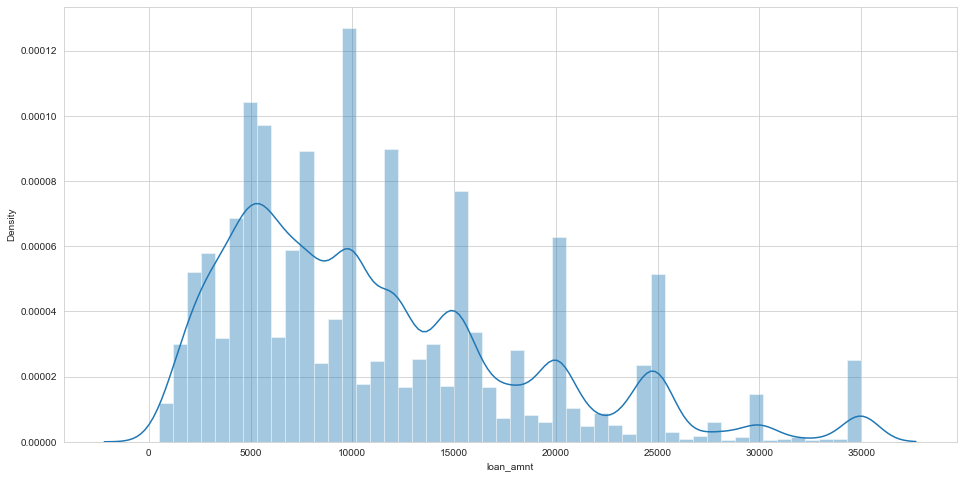

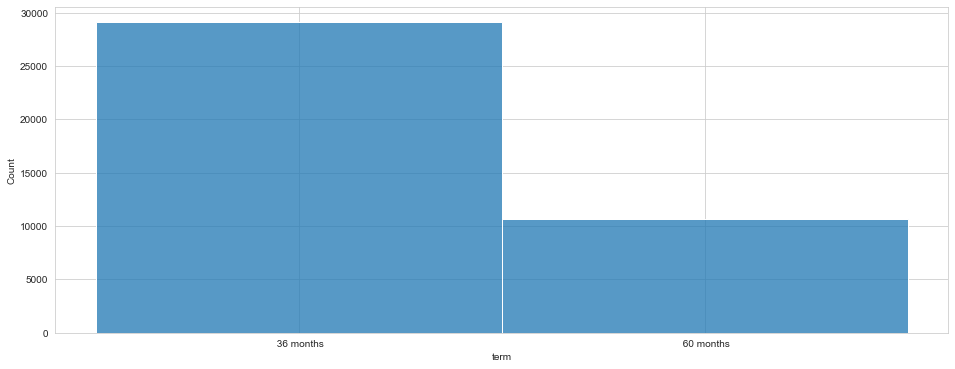

In [5]:
# Individual Column Analysis
# bellow are some examples of python functions used for individual analysis of each variable in loan dataframe
# only few of them are stated bellow as they are repeatedly used for each column understanding 

print("ID")
print(loan_df["id"].describe())

print("Member_ID")
print(loan_df["member_id"].describe())

print("Loan Amount")
print(loan_df["loan_amnt"].describe())

print(loan_df["verification_status"].unique())
print(loan_df["issue_d"].isna().sum())
print(loan_df["id"].nunique(dropna = True))


# Ploting graph for understanding loan_amnt variable

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
sns.distplot(loan_df["loan_amnt"]) 
plt.show()

# Ploting graph for understanding term variable

fig = plt.figure(figsize=(16,6))
sns.set_style("whitegrid") 
sns.histplot(loan_df["term"]) 
plt.show()


In [6]:
# Display first few rows of the dataframe before data cleanup process

pd.set_option('display.max_columns', None)   # This command releases restriction on max columns display
print(loan_df.head(10))

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade                  emp_title emp_length  \
0   10.65%       162.87     B        B2                     

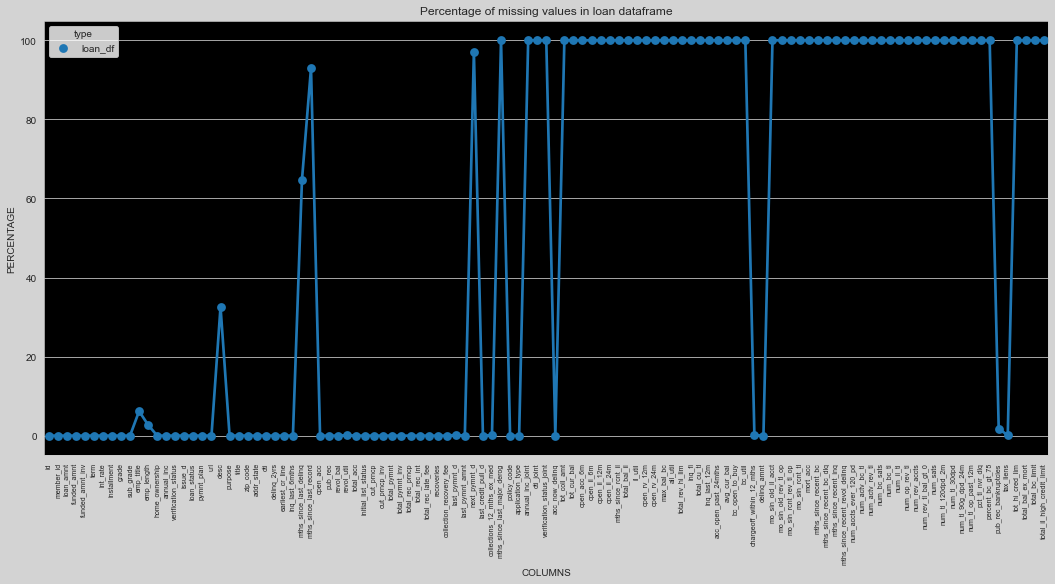

In [7]:
# Percentage of missing values in the dataframe

fig = plt.figure(figsize=(18,8))
miss_loan_df = pd.DataFrame((loan_df.isnull().sum())*100/loan_df.shape[0]).reset_index()
miss_loan_df["type"] = "loan_df"
ax = sns.pointplot("index", 0, data=miss_loan_df, hue="type")
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Percentage of missing values in loan dataframe")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

### SECTION2 : DATA CLEANING

### Clean the data process
Flow for cleaning :-
1. Fix Rows and columns
2. Fix Missing Values
3. Standardize values
4. Fix Invalid Values
5. Filter Data
-----
1. Fixing Rows And Columns<br>
     A. Fixing Rows
        1. detect unnacessary Rows (code snippet - 3)
            - deleting the rows with loan status "Current" as the loan is in process.
        2. delete summary Rows - No summary rows like total and subtotal present in Dataframe
        3. delete extra Rows (code snippet - 1, 2)
            - there is no extra / empty / duplicate rows in Dataframe

In [8]:
#code snippet :- 1
#Finding duplicate Rows and delete if required

duplicate_rows = loan_df[loan_df.duplicated()]
print(duplicate_rows.shape)

## Output --> 0 duplicate Rows

# code snippet :- 2
# Checking and deleting Empty rows from Dataset

loan_df = loan_df[~loan_df.isna().all(axis=1)]
print(loan_df.shape)

##output --> no empty rows

#code snippet :- 3
# Drop rows which has 'loan_status' value as 'Current' 
# (That is consider only Fully Paid' or 'Charged Off' records as we know that they are defaulters or not)

loan_df = loan_df[loan_df["loan_status"] != 'Current']
print(loan_df.shape)

## Output --> number of rows and columns after deleting rows with current loan status

(0, 111)
(39717, 111)
(38577, 111)


1. Fixing Rows And Columns<br>
    B. Fixing Columns:
        - Add coulumn names if missing :- covered in standardizee value step
        - delete unnecessary columns :- (code snippet - 4) - deleted observed unnecessary columns
        - spliting columns for more data - no columns splitted
        - Rename Columns Consistently :- (code snippet - 5) - renamed some columns for better understanding purpose
        - Merge columns for identifiers :- no columns are merged
        - Align missaligned columns :- no missaligned columns are found

In [9]:
# code snippet :- 4

# Drop the columns which are not required to achieve our goal, such as customer behaviour variables, 
# and columns which do not contain any value (all NaNs)

loan_df.drop([
    'delinq_2yrs',
    'earliest_cr_line',
    'inq_last_6mths',
    'open_acc',
    'pub_rec',
    'revol_bal',
    'revol_util',
    'total_acc',
    'initial_list_status',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'last_credit_pull_d',
    'collections_12_mths_ex_med',
    'mths_since_last_major_derog',
    'policy_code',
    'application_type',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'acc_now_delinq',
    'tot_coll_amt',
    'tot_cur_bal',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'total_rev_hi_lim',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'acc_open_past_24mths',
    'avg_cur_bal',
    'bc_open_to_buy',
    'bc_util',
    'chargeoff_within_12_mths',
    'delinq_amnt',
    'mo_sin_old_il_acct',
    'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl',
    'mort_acc',
    'mths_since_recent_bc',
    'mths_since_recent_bc_dlq',
    'mths_since_recent_inq',
    'mths_since_recent_revol_delinq',
    'num_accts_ever_120_pd',
    'num_actv_bc_tl',
    'num_actv_rev_tl',
    'num_bc_sats',
    'num_bc_tl',
    'num_il_tl',
    'num_op_rev_tl',
    'num_rev_accts',
    'num_rev_tl_bal_gt_0',
    'num_sats',
    'num_tl_120dpd_2m',
    'num_tl_30dpd',
    'num_tl_90g_dpd_24m',
    'num_tl_op_past_12m',
    'pct_tl_nvr_dlq',
    'percent_bc_gt_75',
    'pub_rec_bankruptcies',
    'tax_liens',
    'tot_hi_cred_lim',
    'total_bal_ex_mort',
    'total_bc_limit',
    'total_il_high_credit_limit'], axis = 1, inplace=True)

print(loan_df.shape)

# output :- DataFrame with only required columns(variables)

# code snippet :- 5
# columns to be renamed as
#     1. term ---> term_in_months
#     2. issue_d ---> loan_issue_date

loan_df.rename(columns = {'term': 'term_in_months', 'issue_d': 'loan_issue_date'}, inplace = True)
print(loan_df[['term_in_months', 'loan_issue_date']].head(1))

# output :- DataFrame with above columns as renamed


(38577, 27)
  term_in_months loan_issue_date
0      36 months          Dec-11


----
2. Fixing Missing Values
       - Finding all rows and columns with  missing values (code snippet - 6)
       - Fill Missing Values with some meaningful value (like constant 0 or average values in place of blanks
           or NaNs (code snippet - 7 and 8)
       - fill partial missing values - no partially missed values found
       - remove missing values - no values are removed at the moment

In [10]:
# code snippet:- 6

# Finding columns and rows with empty (.eq('')) or NaN (.isnull()) values in the dataframe

missing_cols, missing_rows = ((loan_df.isnull().sum(x) | loan_df.eq('').sum(x)).loc[lambda x: x.gt(0)].index for x in (0, 1))
loan_df.loc[missing_rows, missing_cols]

,emp_title,emp_length,desc,title,mths_since_last_delinq,mths_since_last_record
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,NaN,NaN
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,NaN,NaN
2,NaN,10+ years,NaN,real estate business,NaN,NaN
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,personel,35.0,NaN
5,Veolia Transportaton,3 years,NaN,My wedding loan I promise to pay back,NaN,NaN
...,...,...,...,...,...,...
39706,NaN,< 1 year,Need a loan to remodel my kitchen,remodelin my kitchen,0.0,0.0
39709,Self-Employeed,< 1 year,NaN,P's Family Credit Loan,0.0,44.0
39710,Rush Univ Med Grp,1 year,NaN,My Credit Card Loan,0.0,0.0
39714,NaN,< 1 year,NaN,MBA Loan Consolidation,0.0,0.0


In [11]:
# code snippet :- 7

# filling Missing Values for emp_title , desc, title
# Assumption - Filling All NaN as "Not Provided" considering it as default for all missing values
# This assumption will help in chategorizing records with inadequate information

loan_df[['emp_title', 'desc', 'title']] = loan_df[['emp_title', 'desc', 'title']].fillna('Not Provided')
print(loan_df[['emp_title', 'desc', 'title']].isna().sum())

## output = emp_title , desc, title coulmns missed values are filled with "Not Provided" as default.


# code snippet :- 8

# filling Missing values for mths_since_last_delinq and mths_since_last_record values

# Assumptions 1:- 
# for mths_since_last_delinq column the NaN can be filled with 121 as using any value between 0 to 120 can impact the analysis 

loan_df['mths_since_last_delinq'] = loan_df['mths_since_last_delinq'].fillna('121')
loan_df['mths_since_last_delinq'] = loan_df['mths_since_last_delinq'].astype(int)
print(loan_df['mths_since_last_delinq'].isna().sum())

# Assumptions 2:-
# for mths_since_last_record column the NaN can be filled with 130 as using any value between 0 to 129 can impact the analysis  

loan_df['mths_since_last_record'] = loan_df['mths_since_last_record'].fillna('130')
loan_df['mths_since_last_record'] = loan_df['mths_since_last_record'].astype(int)
print(loan_df['mths_since_last_record'].isna().sum())

## Output :- NaN values for mths_since_last_delinq, mths_since_last_record replaced with 121 and 130 respectively.

emp_title    0
desc         0
title        0
dtype: int64
0
0


-----------
3. Satndardize Values
    1. Standardize Numbers - remove outliers, scaling values, standardize precision (code snippet - 9, 10, 11 )
    2. Standardize text Values - remove extra characteres, standardize value formats (code snippet - 12)
    3. Code snippet 13 :- int_rate_in_bucket_range & installment_in_bucket_range these 2 columns are created with values as buckets ranges from int_rate and intallment columns respectively
4. Fixing Invalid Values :- no invalid values found

In [12]:
# code snippet :- 9
# Standardize Numbers :- 

# 1. Convert float values of funded_amnt_inv column to integer values

loan_df["funded_amnt_inv"] = loan_df["funded_amnt_inv"].astype(int)
print(loan_df["funded_amnt_inv"].dtype)

# 2. Remove '%' text from values of 'int_rate' column and convert the column dtype to float

loan_df["int_rate"] = loan_df["int_rate"].map(lambda x: x.rstrip('%'))
loan_df["int_rate"] = loan_df["int_rate"].astype(float)
print(loan_df["funded_amnt_inv"].head(4))

# 3. Convert float values of 'installmente' column to an integer values

loan_df["installment"] = loan_df["installment"].round().astype(int)
print(loan_df["installment"].dtype)

int32
0     4975
1     2500
2     2400
3    10000
Name: funded_amnt_inv, dtype: int32
int32


82000.0
40000.0
42000.0
(36815, 27)


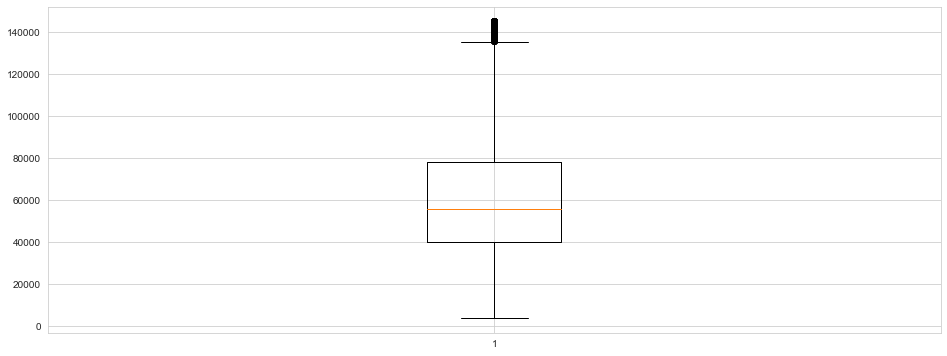

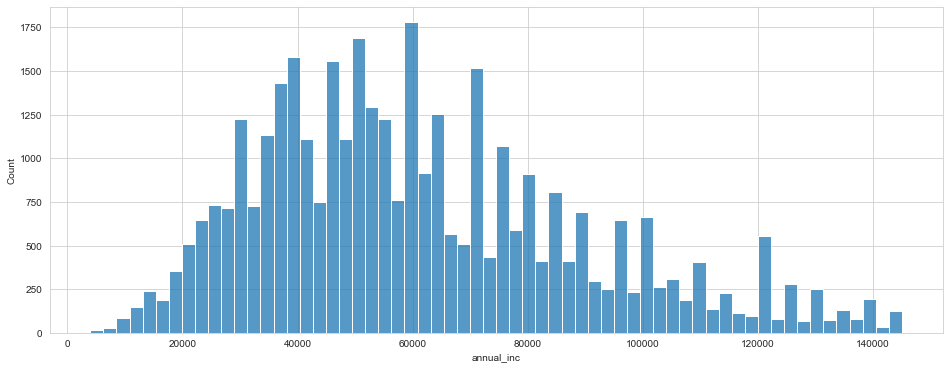

In [13]:
# code snippet :- 10

# Remove outliers from 'annual_inc' column

Q1 = loan_df["annual_inc"].quantile(0.25)
Q3 = loan_df["annual_inc"].quantile(0.75)
IQR = Q3 - Q1
print(Q3)
print(Q1)
print(IQR)

# left, right = left.align(right, axis=1, copy=False)

loan_df = loan_df[~((loan_df["annual_inc"] < (Q1 - 1.5 * IQR)) | (loan_df["annual_inc"] > (Q3 + 1.5 * IQR)))]
print(loan_df.shape)  # Display the shape of dataframe after removing rows containing outliers in 'annual_inc' column

# Plot a boxplot after removing outliers from 'annual_inc' column

fig = plt.figure(figsize=(16,6))
plt.boxplot(loan_df["annual_inc"])
plt.show()

fig = plt.figure(figsize=(16,6))
sns.set_style("whitegrid") 
sns.histplot(loan_df["annual_inc"]) 
plt.show()

count    36815.000000
mean        13.437614
std          6.660651
min          0.000000
25%          8.340000
50%         13.570000
75%         18.700000
max         29.990000
Name: dti, dtype: float64


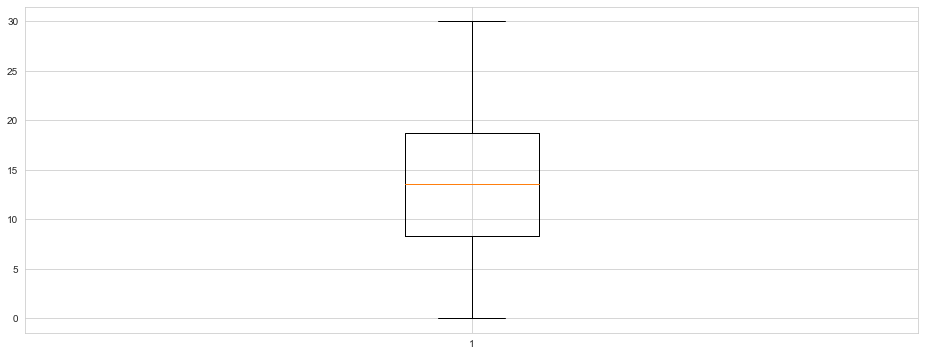

In [14]:
# code snippet :- 11

# Understand the 'dti' spread. There appears to be no outlier.

print(loan_df["dti"].describe())


# Plot a boxplot for 'dti' column for understanding outlier

fig = plt.figure(figsize=(16,6))
plt.boxplot(loan_df["dti"])
plt.show()

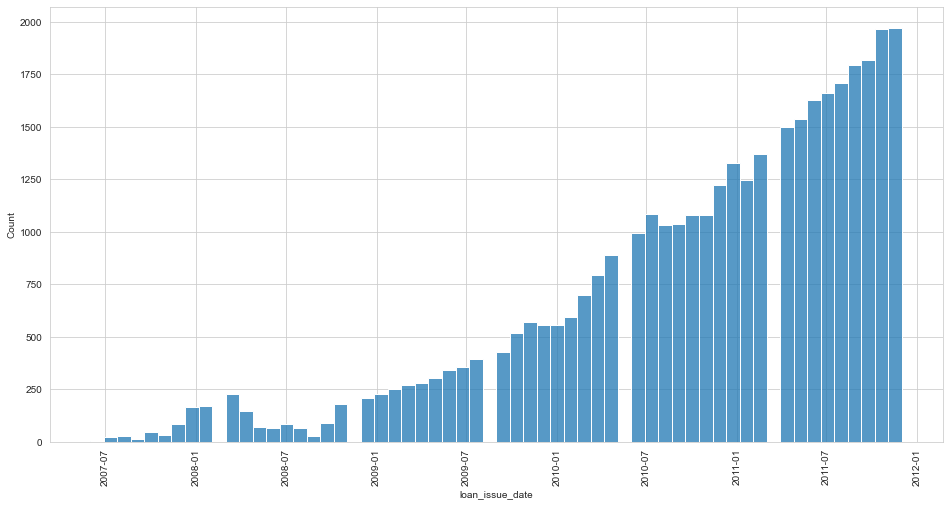

In [15]:
# code snippet :- 12

# 1. Remove ' months' text from values of 'term' column and convert the column dtype to integer

loan_df["term_in_months"] = loan_df["term_in_months"].map(lambda x: x.rstrip(' months'))
loan_df["term_in_months"] = loan_df["term_in_months"].astype(int)


# 2. Remove unwanted text and convert 'emp_length' column values to integer

loan_df["emp_length"] = loan_df["emp_length"].fillna('0')                          # Remove NaN values
loan_df["emp_length"] = loan_df["emp_length"].map(lambda x: x.rstrip(' years'))    # Remove ' years'
loan_df["emp_length"] = loan_df["emp_length"].map(lambda x: x.rstrip(' year'))     # Remove ' year'
loan_df["emp_length"] = loan_df["emp_length"].map(lambda x: x.lstrip('< '))        # Remove '< '
loan_df["emp_length"] = loan_df["emp_length"].map(lambda x: x.rstrip('+'))         # Remove '+'

loan_df["emp_length"] = loan_df["emp_length"].astype(int)                          # Convert to integer


# 3. removing 'xx' from zip_code coulmn values and making it as int

loan_df["zip_code"] = loan_df["zip_code"].apply(lambda x : int(x.replace('xx','')))


# 4. Convert mmm-yy format 'loan_issue_date' column values to yy-mm-dd format
# Assumptions - to convert into date format we need a full date and the day part is missing 
# hence assumed it as 01 i.e 1st day of each month - it will not impact the data analysis

loan_df["loan_issue_date"] = loan_df["loan_issue_date"].apply(lambda x : "01-"+x)
loan_df["loan_issue_date"] = pd.to_datetime(loan_df["loan_issue_date"])

# Plot a bar graph for loan_issue_date to look at the spread after fix

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
plt.xticks(rotation=90)
sns.histplot(loan_df["loan_issue_date"]) 
plt.show()


In [16]:
# code snippet :- 13

# 1. Bin the 'int_rate' data into 10 buckets 

custom_int_rate_bucket_arr = np.linspace(5,25,11)
custom_int_rate_bucket_arr

# created int_rate_in_bucket_range column with the values in bins as per int_rate and display its value_counts()

loan_df["int_rate_in_bucket_range"] = pd.cut(loan_df["int_rate"], custom_int_rate_bucket_arr)
loan_df["int_rate_in_bucket_range"].value_counts()

# 2. Bin the 'installment' data into 10 buckets and display its value_counts()

custom_installment_bucket_arr = np.linspace(0,1500,16)
custom_installment_bucket_arr

# created installment_in_bucket_range column with the values in bins as per installment and display its value_counts()

loan_df["installment_in_bucket_range"] = pd.cut(loan_df["installment"], custom_installment_bucket_arr)
loan_df["installment_in_bucket_range"].value_counts()

(100.0, 200.0]      8931
(200.0, 300.0]      7419
(300.0, 400.0]      6821
(0.0, 100.0]        3970
(400.0, 500.0]      3754
(500.0, 600.0]      2400
(600.0, 700.0]      1610
(800.0, 900.0]       842
(700.0, 800.0]       696
(900.0, 1000.0]      211
(1000.0, 1100.0]      67
(1100.0, 1200.0]      59
(1200.0, 1300.0]      33
(1300.0, 1400.0]       2
(1400.0, 1500.0]       0
Name: installment_in_bucket_range, dtype: int64

#### DataFrame after data cleaning step

In [17]:
# Display the number of columns and rows of data after cleanup

print(loan_df.shape)

# Display first few rows of cleaned up dataframe

pd.set_option('display.max_columns', None)   # This command releases restriction on max columns display
loan_df.head(30)

(36815, 29)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_issue_date,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,int_rate_in_bucket_range,installment_in_bucket_range
0,1077501,1296599,5000,5000,4975,36,10.65,163,B,B2,Not Provided,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860,AZ,27.65,121,130,"(9.0, 11.0]","(100.0, 200.0]"
1,1077430,1314167,2500,2500,2500,60,15.27,60,C,C4,Ryder,1,RENT,30000.00,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309,GA,1.00,121,130,"(15.0, 17.0]","(0.0, 100.0]"
2,1077175,1313524,2400,2400,2400,36,15.96,84,C,C5,Not Provided,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Not Provided,small_business,real estate business,606,IL,8.72,121,130,"(15.0, 17.0]","(0.0, 100.0]"
3,1076863,1277178,10000,10000,10000,36,13.49,339,C,C1,AIR RESOURCES BOARD,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917,CA,20.00,35,130,"(13.0, 15.0]","(300.0, 400.0]"
5,1075269,1311441,5000,5000,5000,36,7.90,156,A,A4,Veolia Transportaton,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Not Provided,wedding,My wedding loan I promise to pay back,852,AZ,11.20,121,130,"(7.0, 9.0]","(100.0, 200.0]"
6,1069639,1304742,7000,7000,7000,60,15.96,170,C,C5,Southern Star Photography,8,RENT,47004.00,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280,NC,23.51,121,130,"(15.0, 17.0]","(100.0, 200.0]"
7,1072053,1288686,3000,3000,3000,36,18.64,109,E,E1,MKC Accounting,9,RENT,48000.00,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900,CA,5.35,121,130,"(17.0, 19.0]","(100.0, 200.0]"
8,1071795,1306957,5600,5600,5600,60,21.28,152,F,F2,Not Provided,4,OWN,40000.00,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958,CA,5.55,121,130,"(21.0, 23.0]","(100.0, 200.0]"
9,1071570,1306721,5375,5375,5350,60,12.69,121,B,B5,Starbucks,1,RENT,15000.00,Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774,TX,18.08,121,130,"(11.0, 13.0]","(100.0, 200.0]"
10,1070078,1305201,6500,6500,6500,60,14.65,153,C,C3,Southwest Rural metro,5,OWN,72000.00,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853,AZ,16.12,121,130,"(13.0, 15.0]","(100.0, 200.0]"


### SECTION 3 : DATA ANALYSIS

1. Univariate Analysis - (ordered/unordered categorical variable, quantitive variable )
2. Segmented Univariate Analysis ( categorical variable -- groupby , metrics based on mean, median, mode )
3. Bivariate Analysis ( continuous , categorical)
4. Derived Metrics ( Type Driven, Business Driven, Data Driven )

######  1. Univariate Analysis

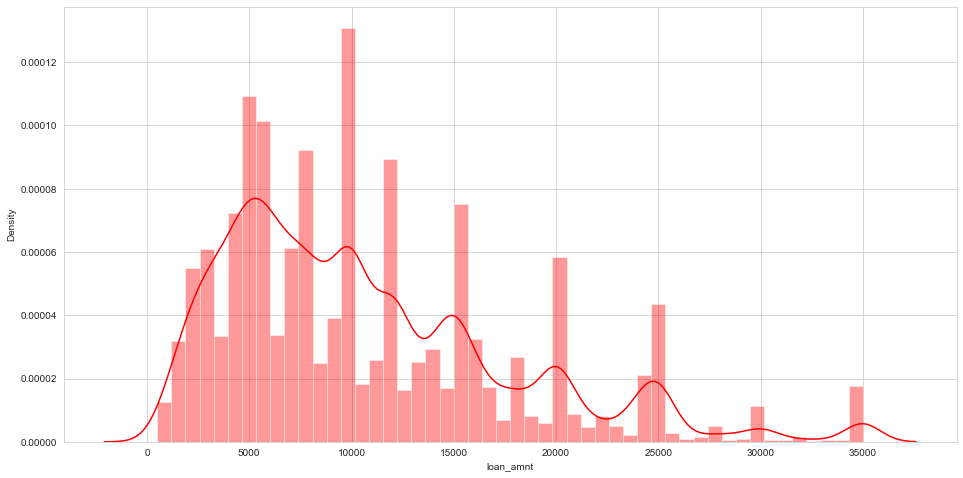

In [18]:
# 1. loan_amount - Quantitative Variable

# Density plot of Loan Amount ('loan_amnt')

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
sns.distplot(loan_df["loan_amnt"], color='red') 
plt.show() 

Observation: Number of customers taking loan of 5000 are higher in number.

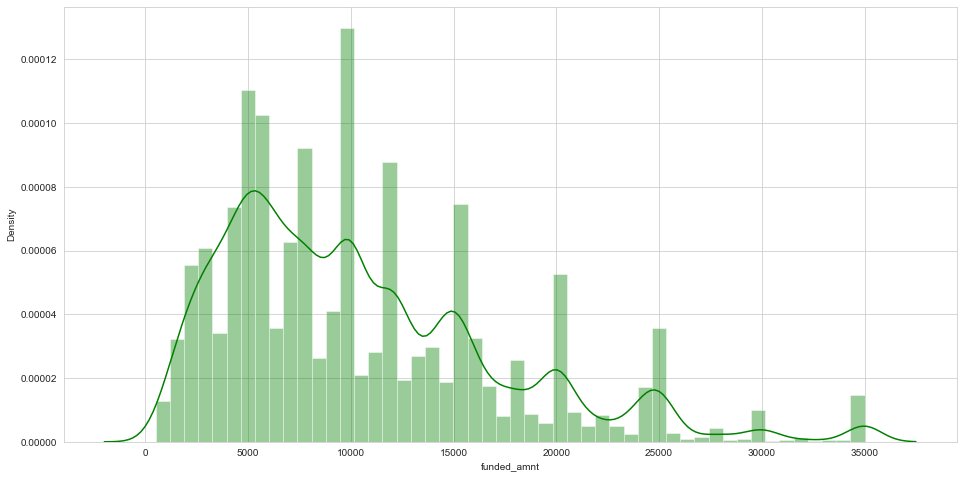

In [19]:
# 2. funded_amnt - Quantitative Variable

# Density plot of Funded Amount ('funded_amnt')

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
sns.distplot(loan_df["funded_amnt"], color='green') 
plt.show()

Observation: More number of customers are being funded the loans between 2500 and 15000

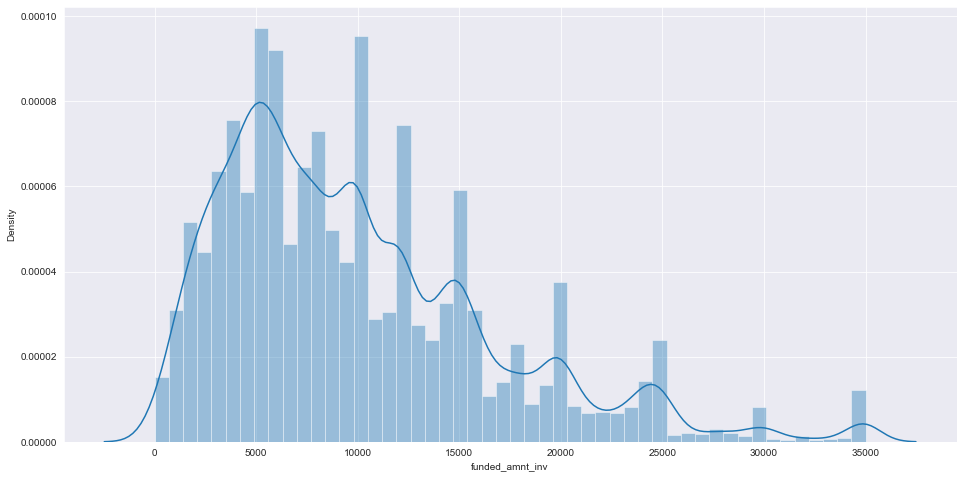

In [20]:
# 3. funded_amnt_inv - Quantitative Variable

# Density plot of Loan Amount ('funded_amnt_inv')

fig = plt.figure(figsize=(16,8))
sns.set_style("darkgrid") 
sns.distplot(loan_df["funded_amnt_inv"]) 
plt.show()

Observation: The Loan funded by investors looks very similar to the Loan Amount and Funded Amount. Let us plot all these parameters in the same plot below.

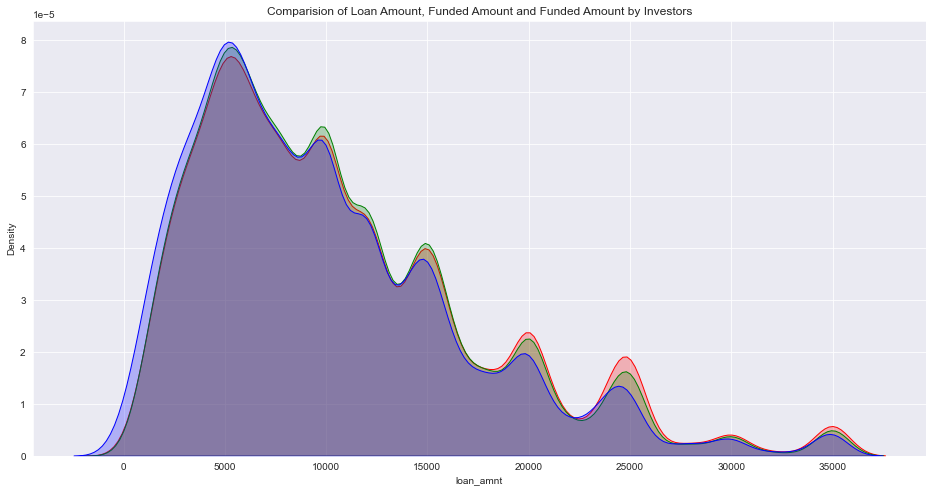

In [21]:
# Plotting distibutions of 'loan_amnt', 'funded_amnt' and 'funded_amnt_inv' on the same figure

fig = plt.figure(figsize=(16,8))
fig = sns.kdeplot(loan_df['loan_amnt'], shade=True, color="r")
fig = sns.kdeplot(loan_df['funded_amnt'], shade=True, color="g")
fig = sns.kdeplot(loan_df['funded_amnt_inv'], shade=True, color="b")
plt.title("Comparision of Loan Amount, Funded Amount and Funded Amount by Investors")
plt.show()

Observation: At lower loan amounts, the funded amount by investors is little bit higher. Whereas for higher loan amounts, it is other way around, i.e. the requested loan amounts are little on the higher side. In both the cases, the difference is not very high.

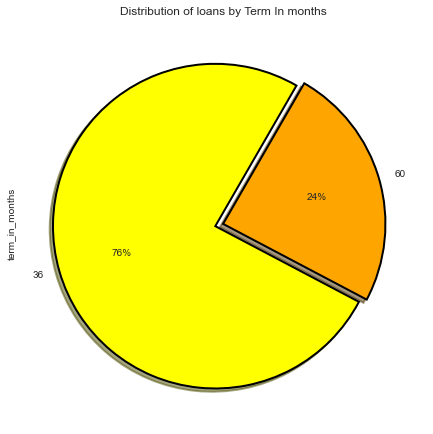

In [22]:
# Percentage distribution plot of 'term' in pieplot

fig = plt.figure(figsize=(16,8))
plt.subplot(121)
loan_df["term_in_months"].value_counts().plot.pie(autopct = "%1.0f%%",
                                        colors = ["yellow", "orange"], 
                                        startangle = 60, 
                                        wedgeprops = {"linewidth":2,"edgecolor":"k"},
                                        explode=(.05,0),
                                        shadow =True)
plt.title("Distribution of loans by Term In months")
plt.show()

Observation: The term distribution is higher for 36 months at 76%, whereas the term distribution for 60 months is 24%.

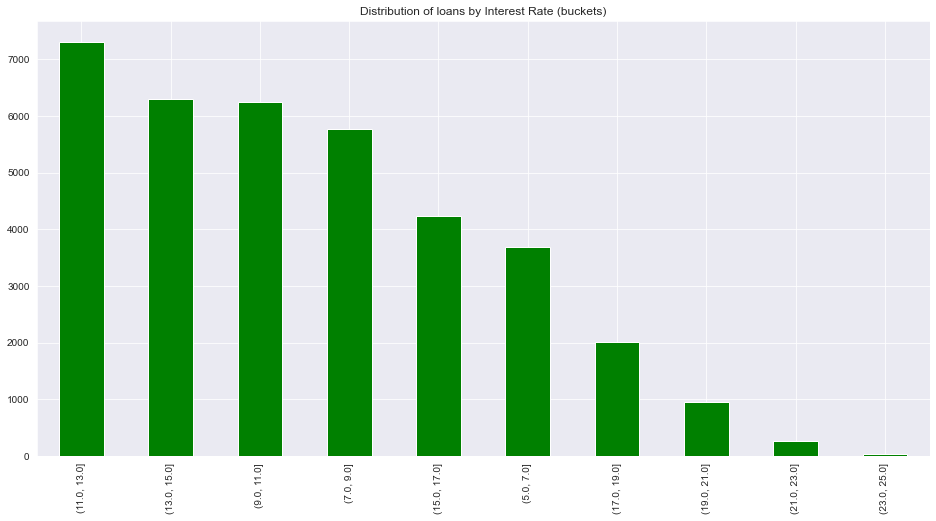

In [23]:
# The sorted bar plot of Interest Rate buckets

fig = plt.figure(figsize=(16,8))
loan_df["int_rate_in_bucket_range"].value_counts().plot(kind='bar', color='g')
plt.title("Distribution of loans by Interest Rate (buckets)")
plt.show()

Observation: The loans funded in the 11% to 13% bucket are highest, Whereas it is the lowest for 23% to 25% bucket.  

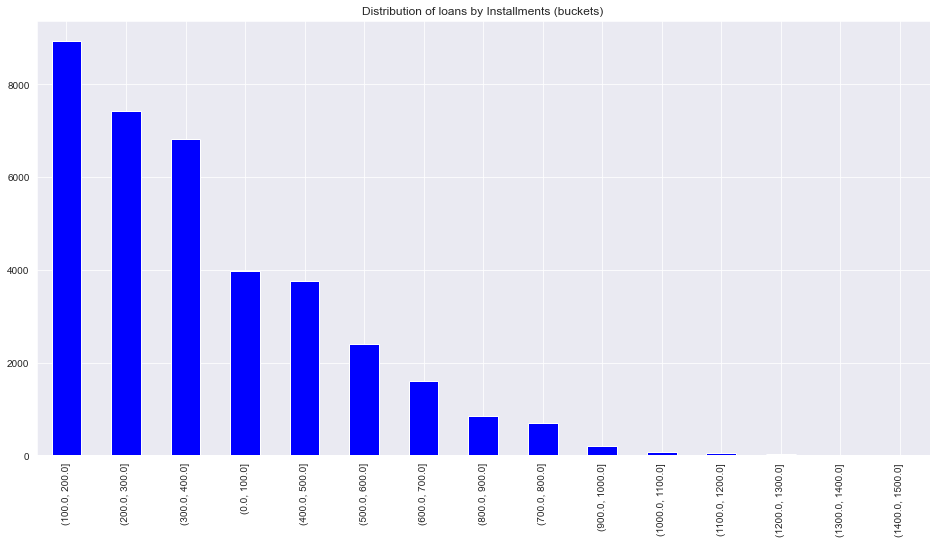

In [24]:
# The sorted bar plot of Installment buckets

fig = plt.figure(figsize=(16,8))
loan_df["installment_in_bucket_range"].value_counts().plot(kind='bar', color='b')
plt.title("Distribution of loans by Installments (buckets)")
plt.show()

Observation: The installments between 100 and 200 are higher in number, followed by 200 to 300 and 300 to 400. The lower number of borrower opted for installments 1000 and higher.

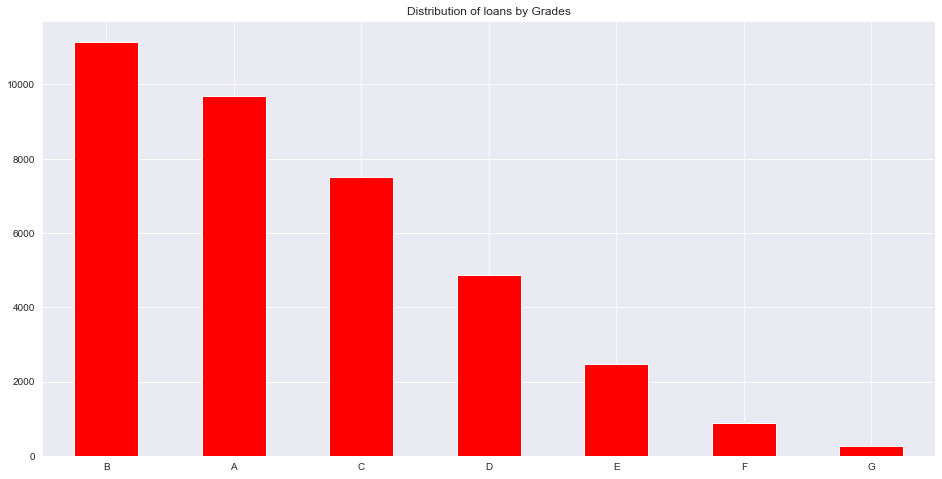

In [25]:
# The sorted bar plot of number of loans funded by grades 

fig = plt.figure(figsize=(16,8))
loan_df["grade"].value_counts().plot(kind='bar', color='r')
plt.xticks(rotation=0)
plt.title("Distribution of loans by Grades")
plt.show()

Observation: The loans funded for grades 'B', 'A' and 'C' are higher.

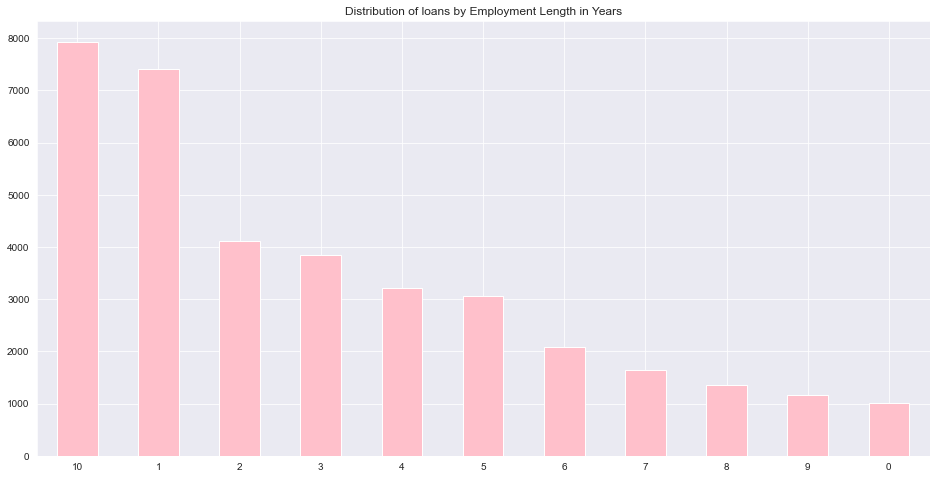

In [26]:
# The sorted bar plot of number of loans funded to applicants with Employment Length 

fig = plt.figure(figsize=(16,8))
loan_df["emp_length"].value_counts().plot(kind='bar', color='pink')
plt.xticks(rotation=0)
plt.title("Distribution of loans by Employment Length in Years")
plt.show()

Observation: Loans taken by borrowers having experience of 10 years and 1 year, are higher. 

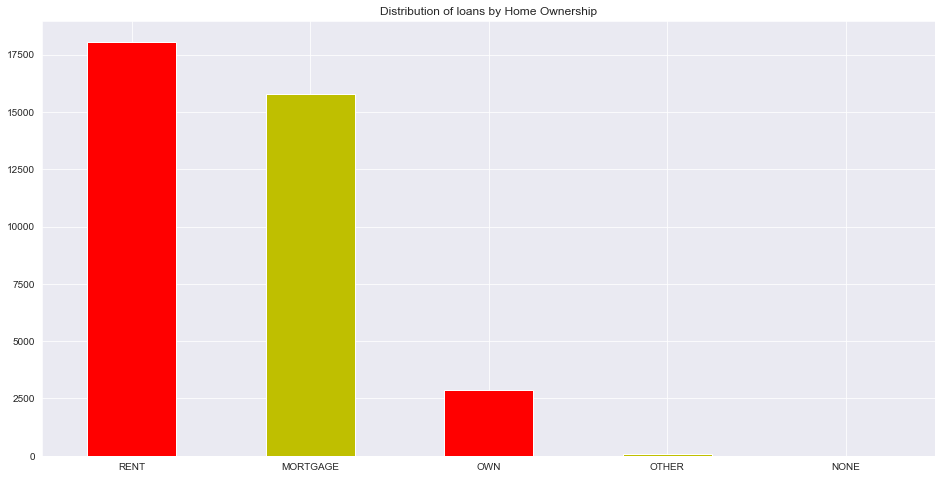

In [27]:
# The sorted bar plot of number of loans funded to applicants with Home Owenership status 

fig = plt.figure(figsize=(16,8))
loan_df["home_ownership"].value_counts().plot(kind='bar', color=("r","y"))
plt.xticks(rotation=0)
plt.title("Distribution of loans by Home Ownership")
plt.show()

Observation: The loans taken by borrowers with rented or mortgaged homes are higher.

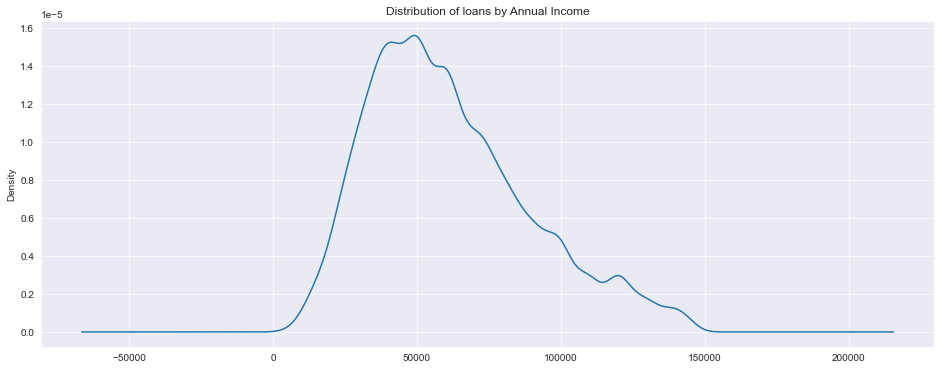

In [28]:
# The distribution plot of applicants by Annual Income  

fig = plt.figure(figsize=(16,6))
loan_df["annual_inc"].plot(kind='kde')
plt.title("Distribution of loans by Annual Income")
plt.show()

Observation: The peak of distribution plot is at 50000 and is left skewed.

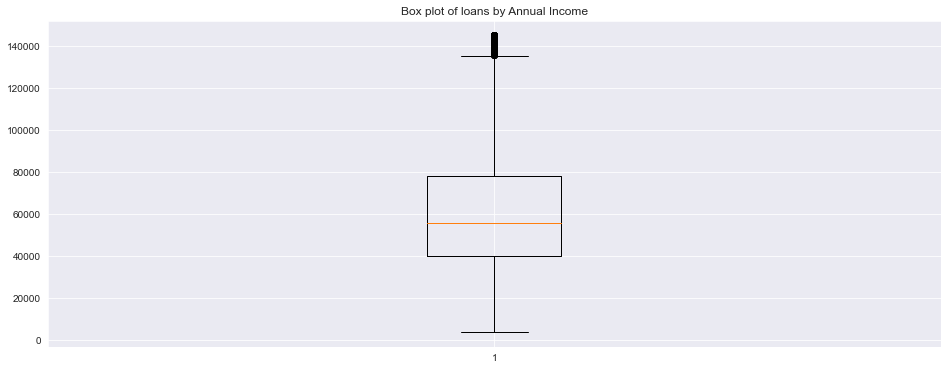

In [29]:
# A Boxplot after removing outliers from 'annual_inc' column

fig = plt.figure(figsize=(16,6))
plt.boxplot(loan_df["annual_inc"])
plt.title("Box plot of loans by Annual Income")
plt.show()

Observation: The 25th percentile is at 40000 and 75th percentile is at around 78000. Some outliers are included after upper fence.

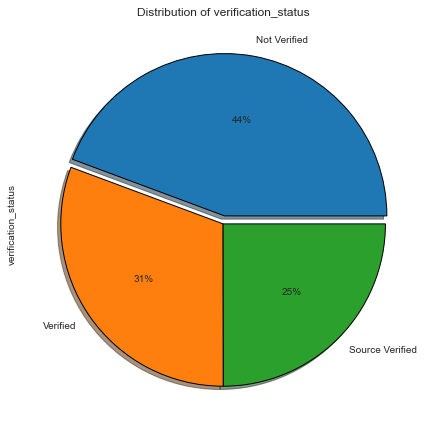

In [30]:
# Percentage distribution of 'verification_status' in pieplot

fig = plt.figure(figsize=(16,8))
plt.subplot(121)
loan_df["verification_status"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                       colors = None,
                                                       startangle = 0, 
                                                       wedgeprops = {"linewidth":1,"edgecolor":"k"},
                                                       explode=(.05,0,0),
                                                       shadow =True)
plt.title("Distribution of verification_status")
plt.show()

Observation: Most of the applicants (56%) have income sources either 'Verified' or 'Source Verified'.

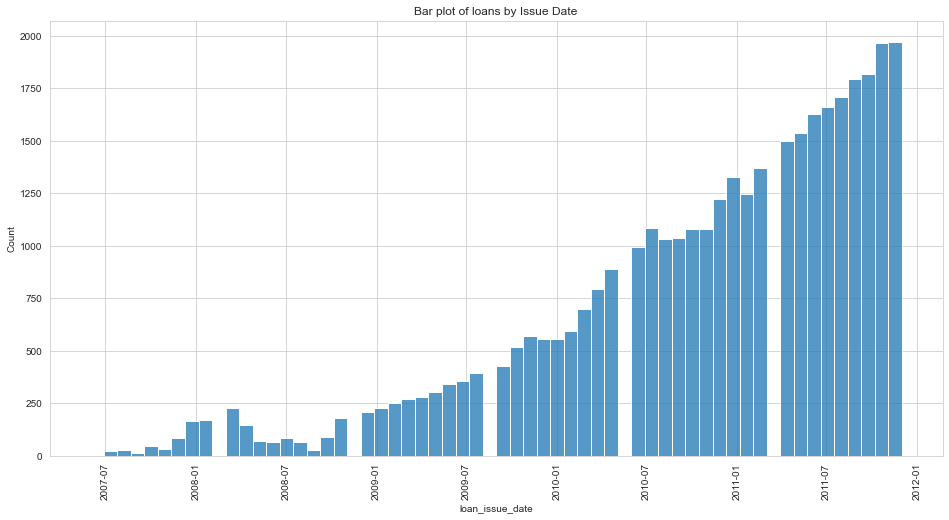

In [31]:
# Bar plot of borrowers by Issue Date 

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
sns.histplot(loan_df["loan_issue_date"]) 
plt.xticks(rotation=90)
plt.title("Bar plot of loans by Issue Date")
plt.show()

Observtion: The loans closer to the report date are higher which reduced gradually. However there are noticeable number of loans taken around March 2008 (Lehman brothers crash) are paid late.

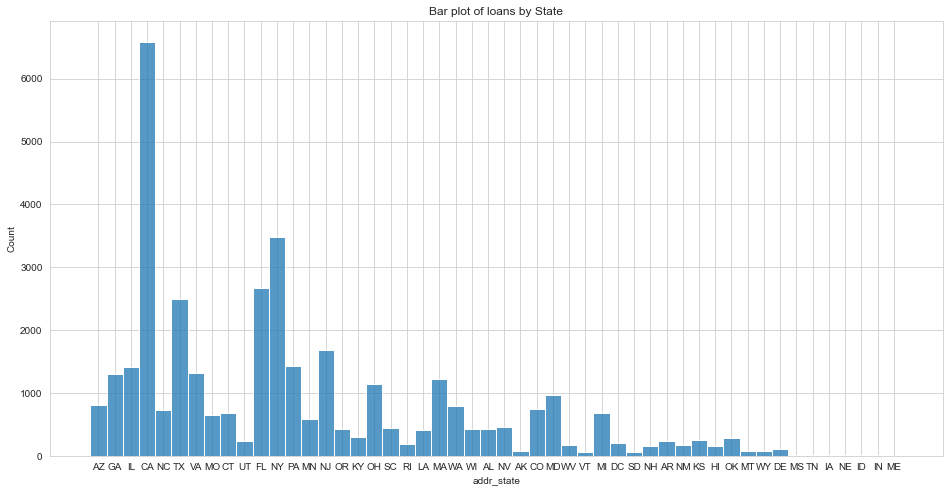

In [32]:
# Bar plot of borrowers by State

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
sns.histplot(loan_df["addr_state"])
plt.xticks(rotation=0)
plt.title("Bar plot of loans by State")
plt.show()

Observation: The number of loans taken by borrowers from 'CA' California state are higher followed by that of 'NY' New York and 'FL Florida states.

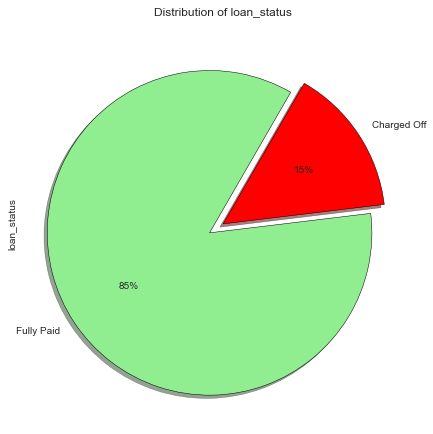

In [33]:
# Percentage distribution of 'loan_status' in pieplot

fig = plt.figure(figsize=(16,8))
plt.subplot(121)
loan_df["loan_status"].value_counts().plot.pie(autopct = "%1.0f%%",
                                               colors = ["lightgreen", "red"],
                                               startangle = 60, 
                                               wedgeprops = {"linewidth":.5,"edgecolor":"k"},
                                               explode=(.1,0),
                                               shadow =True)
plt.title("Distribution of loan_status")
plt.show()

Observation: 85% of the loans are Fully Paid whereas 15% of the loans are Charged-off.

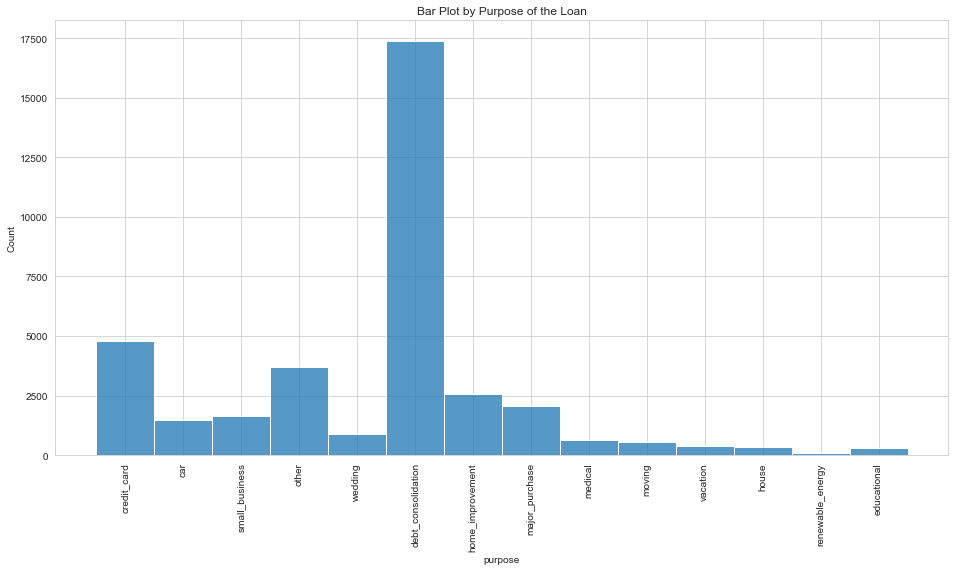

In [34]:
# Bar plot of loans by Purpose of the loan

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
plt.xticks(rotation=90)
sns.histplot(loan_df["purpose"]) 
plt.title("Bar Plot by Purpose of the Loan")
plt.show()

Observation: Loans taken for Debt Conciliation are higher than any other purpose.

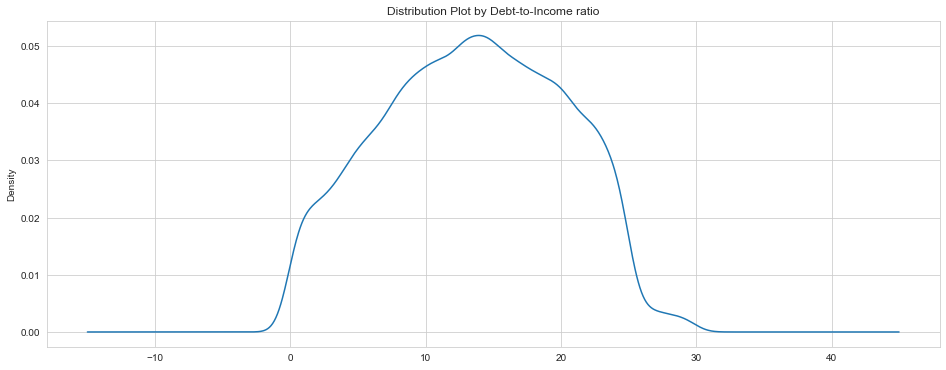

In [35]:
# Distribution plot by Debt-to-Income ratio

fig = plt.figure(figsize=(16,6))
loan_df["dti"].plot(kind='kde')
plt.title("Distribution Plot by Debt-to-Income ratio")
plt.show()

Observation: The number of loans taken are peaked at Debt-to-Income ratio of around 14.

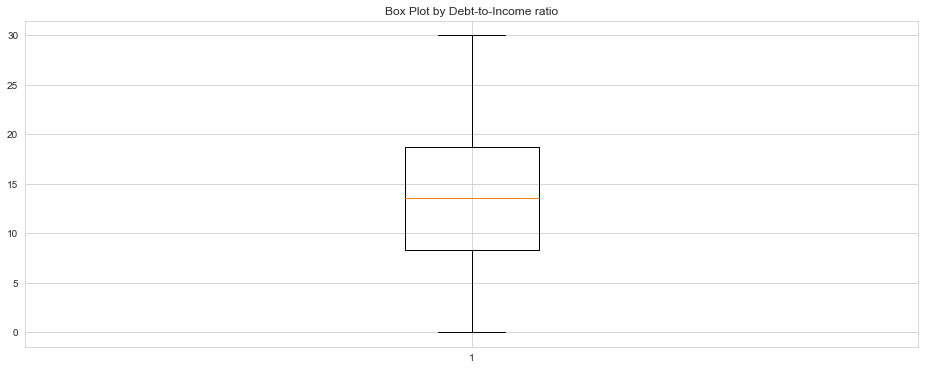

In [36]:
# Boxplot by Debt-to-Income ratio

fig = plt.figure(figsize=(16,6))
plt.boxplot(loan_df["dti"])
plt.title("Box Plot by Debt-to-Income ratio")
plt.show()

Observation: The 25th percentile DTI stands at around 8 and 75th percentile is at around 18. No outliers are observed.

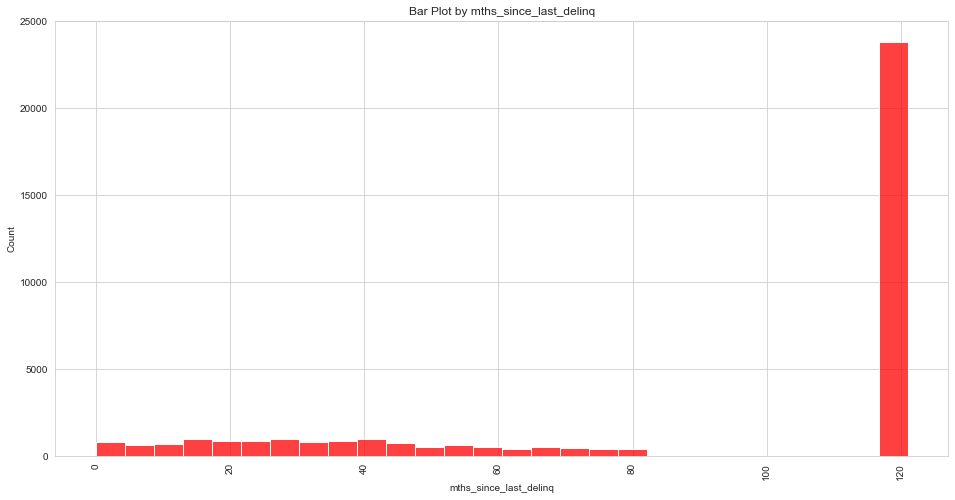

In [37]:
# Bar plot by 'mths_since_last_delinq'

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
plt.xticks(rotation=90)
sns.histplot(loan_df["mths_since_last_delinq"], color='r') 
plt.title("Bar Plot by mths_since_last_delinq")
plt.show()

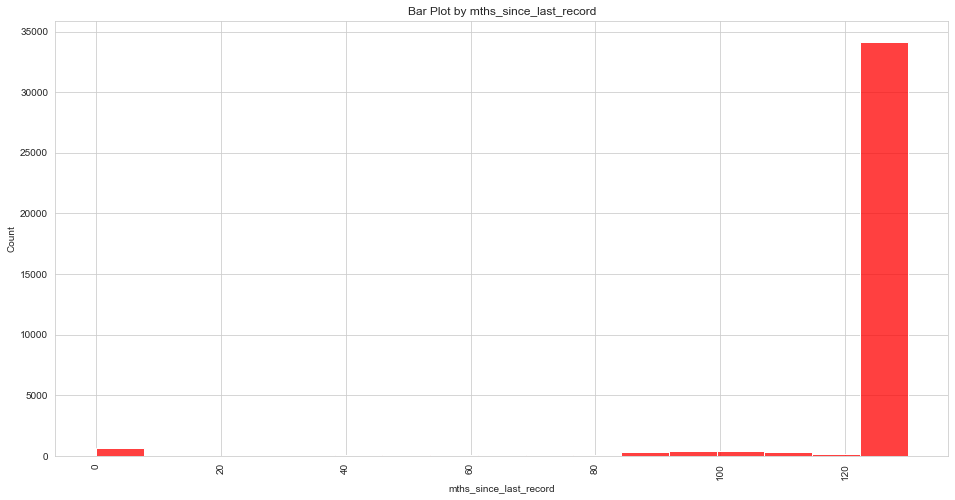

In [38]:
# Bar plot by 'mths_since_last_record'

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
plt.xticks(rotation=90)
sns.histplot(loan_df["mths_since_last_record"], color='r') 
plt.title("Bar Plot by mths_since_last_record")
plt.show()

######  2. Segmented Univariate Analysis

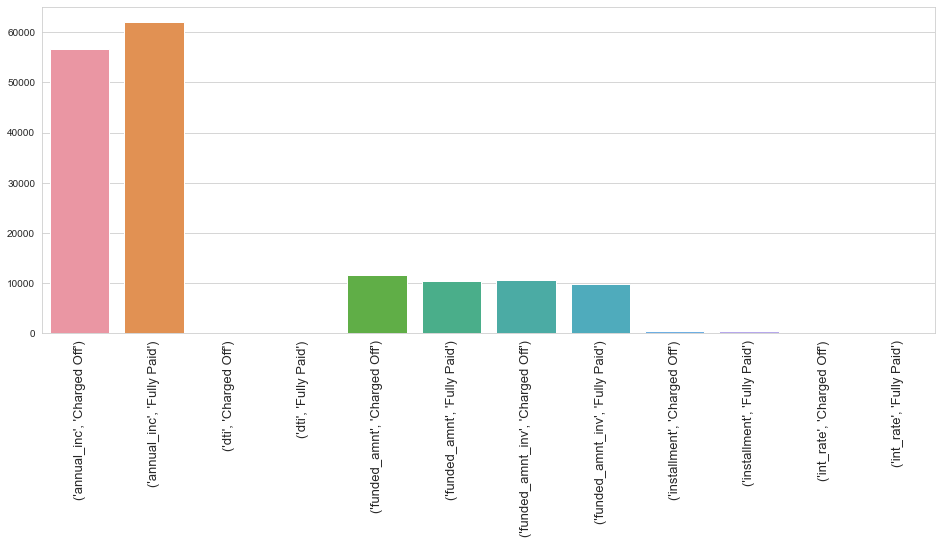

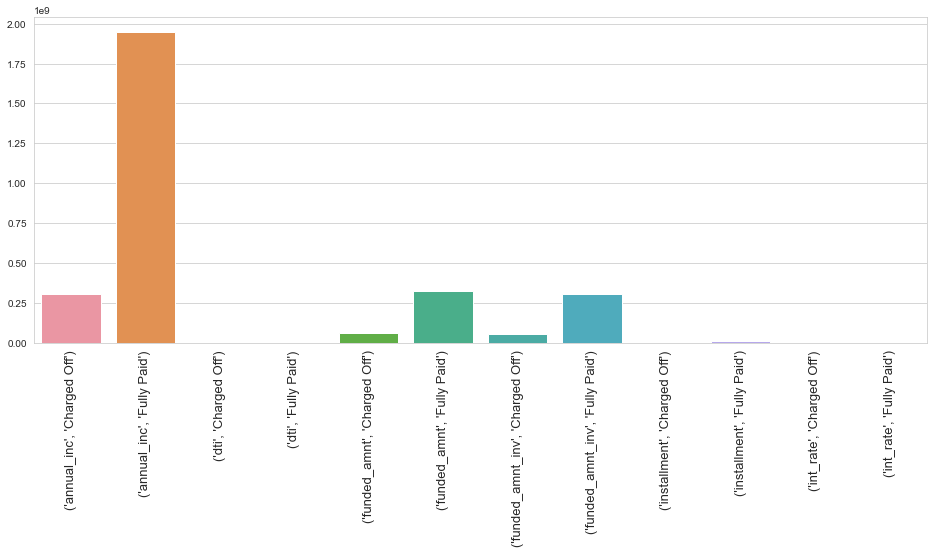

In [39]:
# 1. loan_status - categorical Variable

# 1.1 Mean comparison across categories

fig = plt.figure(figsize=(16,6))
df = loan_df.pivot_table(index=['loan_status'],columns='loan_status', aggfunc='mean')
df = df[["annual_inc", "dti", "funded_amnt", "funded_amnt_inv", "installment", "int_rate"]]
sns.barplot(data=df)
plt.xticks(rotation=90, fontsize=13)
plt.show()


# 1.2 sum comparison across categories

fig = plt.figure(figsize=(16,6))
df = loan_df.pivot_table(index=['loan_status'],columns='loan_status', aggfunc='sum')
df = df[["annual_inc", "dti", "funded_amnt", "funded_amnt_inv", "installment", "int_rate"]]
sns.barplot(data=df)
plt.xticks(rotation=90, fontsize=13)
plt.show()

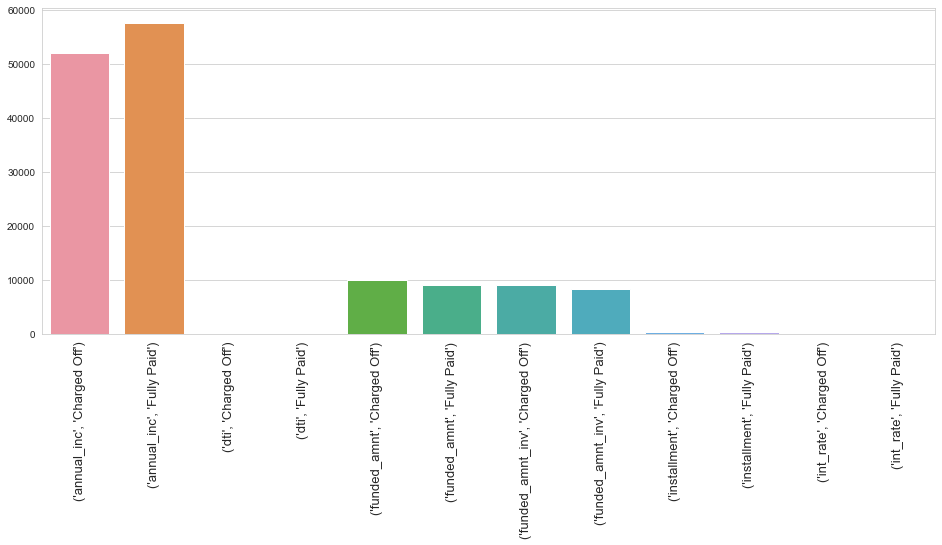

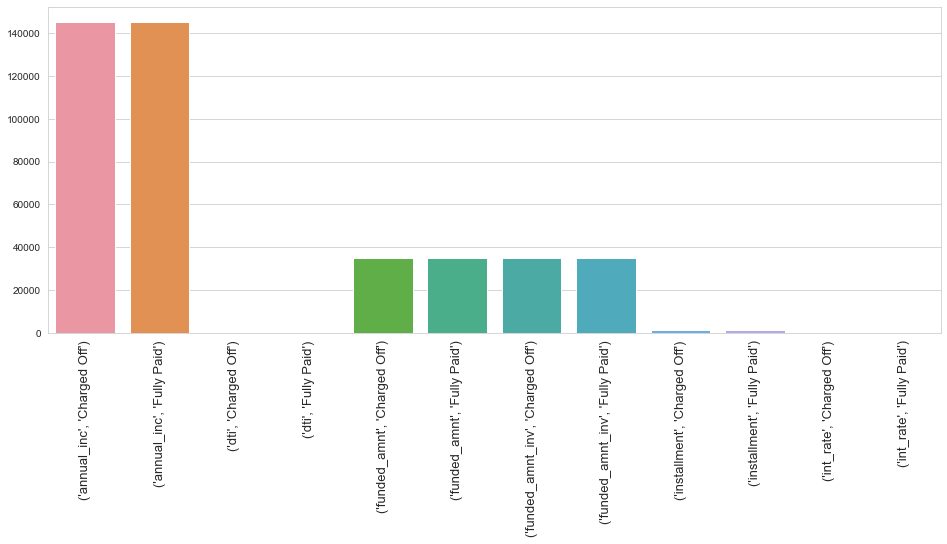

In [40]:
# 1.3 50th percentile of each category

fig = plt.figure(figsize=(16,6))
df = loan_df.pivot_table(index=['loan_status'], columns='loan_status', aggfunc=lambda x: np.percentile(x, 50))
df = df[["annual_inc", "dti", "funded_amnt", "funded_amnt_inv", "installment", "int_rate"]]
sns.barplot(data=df)
plt.xticks(rotation=90, fontsize=13)
plt.show()


# 1.4 max comparison across categories

fig = plt.figure(figsize=(16,6))
df = loan_df.pivot_table(index=['loan_status'], columns='loan_status', aggfunc='max')
df = df[["annual_inc", "dti", "funded_amnt", "funded_amnt_inv", "installment", "int_rate"]]
sns.barplot(data=df)
plt.xticks(rotation=90, fontsize=13)
plt.show()


## Analysis observations :- 
# Among summary functions mean on segmented Loan_status is useful insignt rather than sum , 50% and max for
# showing of impact of other variables for defaulters

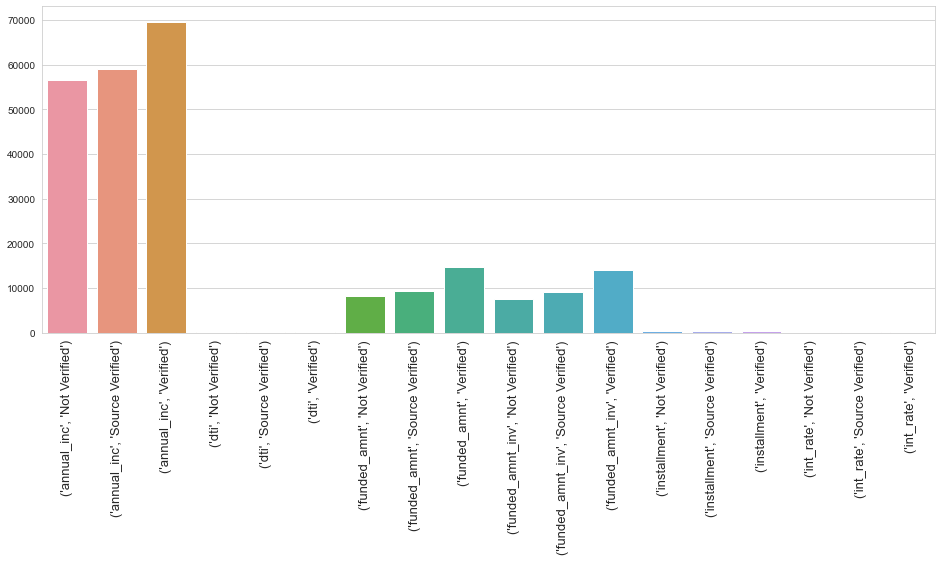

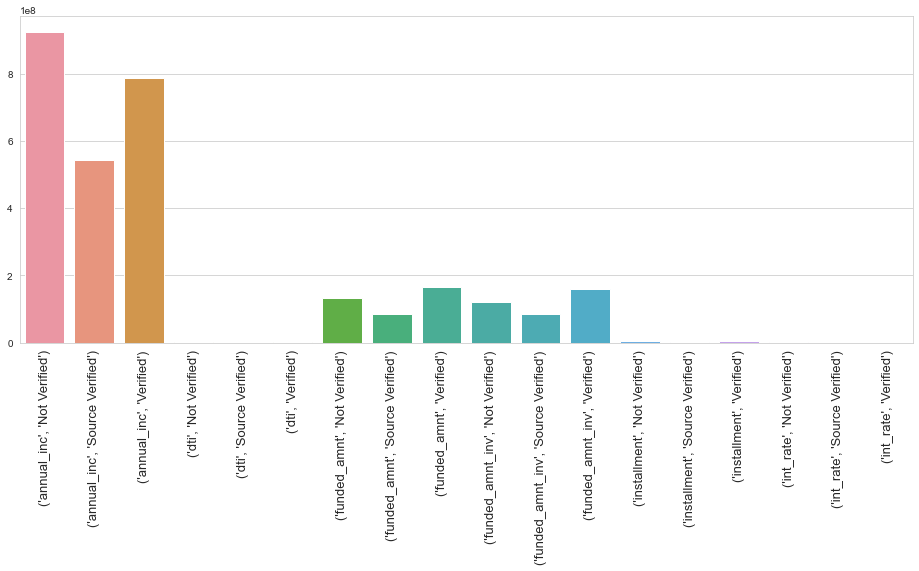

In [41]:
# 2. verfication_status - categorical Variable

# 2.1 mean comparison across categories

fig = plt.figure(figsize=(16,6))
df = loan_df.pivot_table(index=['verification_status'],columns='verification_status',aggfunc='mean')
df = df[["annual_inc", "dti", "funded_amnt", "funded_amnt_inv", "installment", "int_rate"]]
sns.barplot(data=df)
plt.xticks(rotation=90, fontsize=13)
plt.show()

# 2.2 sum comparison across categories

fig = plt.figure(figsize=(16,6))
df = loan_df.pivot_table(index=['verification_status'],columns='verification_status',aggfunc='sum')
df = df[["annual_inc", "dti", "funded_amnt", "funded_amnt_inv", "installment", "int_rate"]]
sns.barplot(data=df)
plt.xticks(rotation=90, fontsize=13)
plt.show()

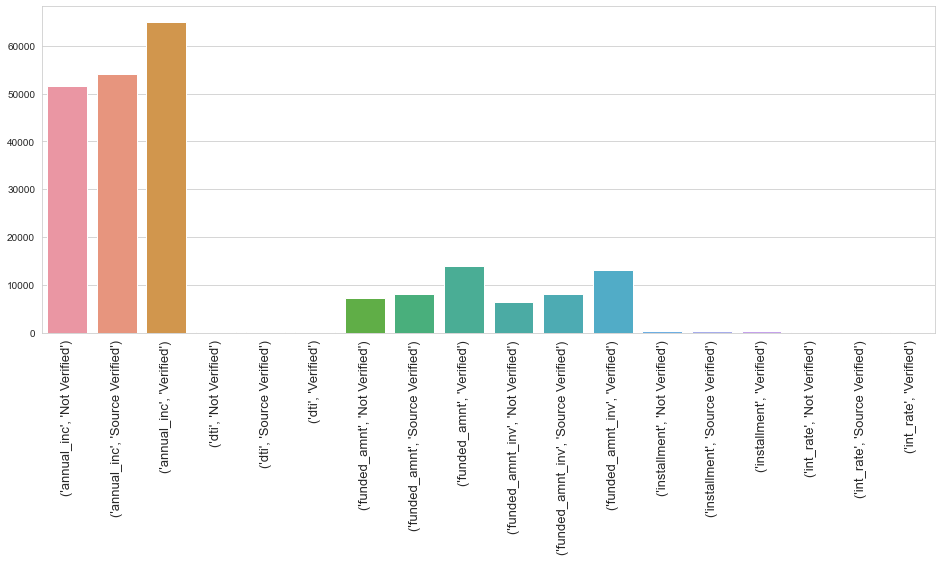

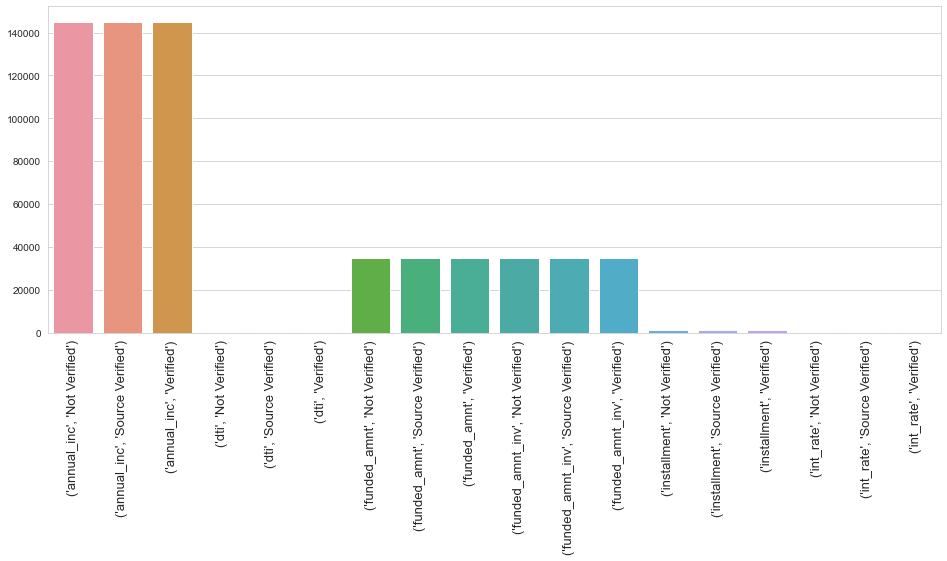

In [42]:
# 2.3 50th percentile of each category

fig = plt.figure(figsize=(16,6))
df = loan_df.pivot_table(index=['verification_status'],columns='verification_status', aggfunc=lambda x: np.percentile(x, 50))
df = df[["annual_inc", "dti", "funded_amnt", "funded_amnt_inv", "installment", "int_rate"]]
sns.barplot(data=df)
plt.xticks(rotation=90, fontsize=13)
plt.show()


# 2.4 max comparison across categories

fig = plt.figure(figsize=(16,6))
df = loan_df.pivot_table(index=['verification_status'],columns='verification_status', aggfunc='max')
df = df[["annual_inc", "dti", "funded_amnt", "funded_amnt_inv", "installment", "int_rate"]]
sns.barplot(data=df)
plt.xticks(rotation=90, fontsize=13)
plt.show()


## Analysis observations :- 
# Among summary functions mean and sum on segmented verification_status is are usefull rather that 50% and max for
# showing of impact of other variables for defaulters

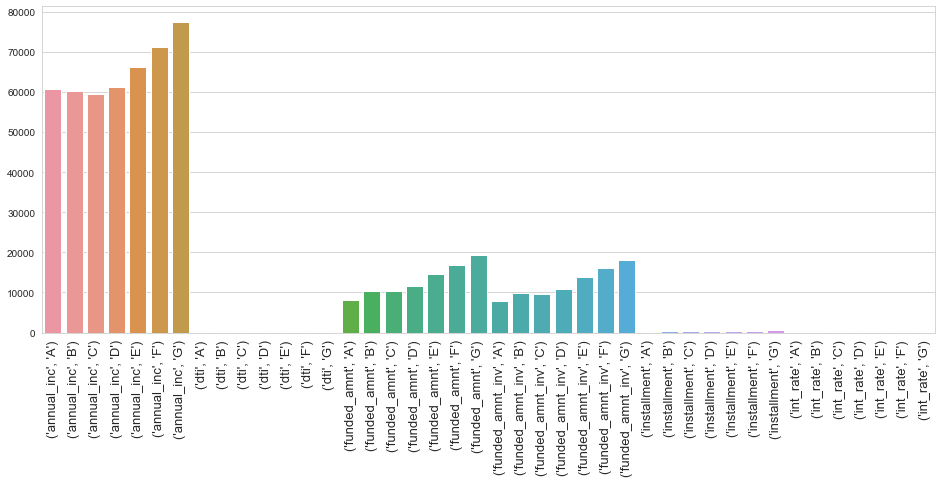

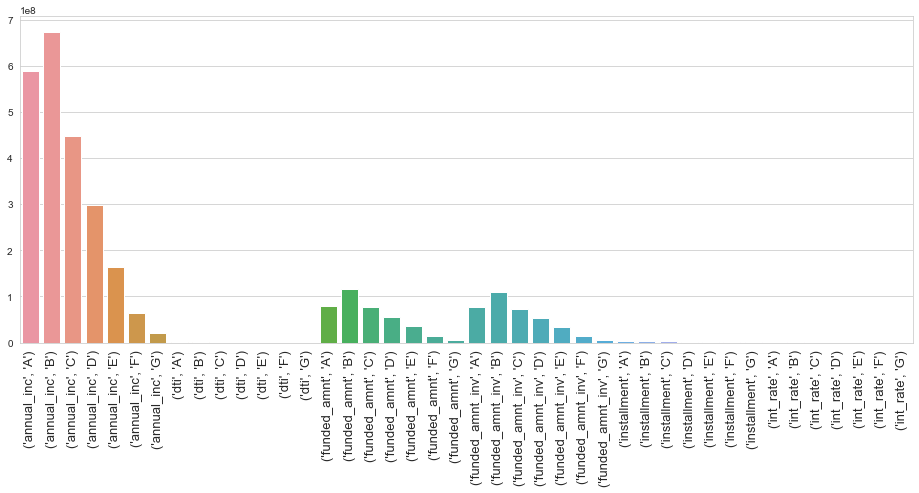

In [43]:
# 3. grade column

# 3.1 mean comparison across categories

fig = plt.figure(figsize=(16,6))
df = loan_df.pivot_table(index=['grade'],columns='grade',aggfunc='mean')
df = df[["annual_inc", "dti", "funded_amnt", "funded_amnt_inv", "installment", "int_rate"]]
sns.barplot(data=df)
plt.xticks(rotation=90, fontsize=13)
plt.show()

# 3.2 sum comparison across categories

fig = plt.figure(figsize=(16,6))
df = loan_df.pivot_table(index=['grade'],columns='grade',aggfunc='sum')
df = df[["annual_inc", "dti", "funded_amnt", "funded_amnt_inv", "installment", "int_rate"]]
sns.barplot(data=df)
plt.xticks(rotation=90, fontsize=13)
plt.show()

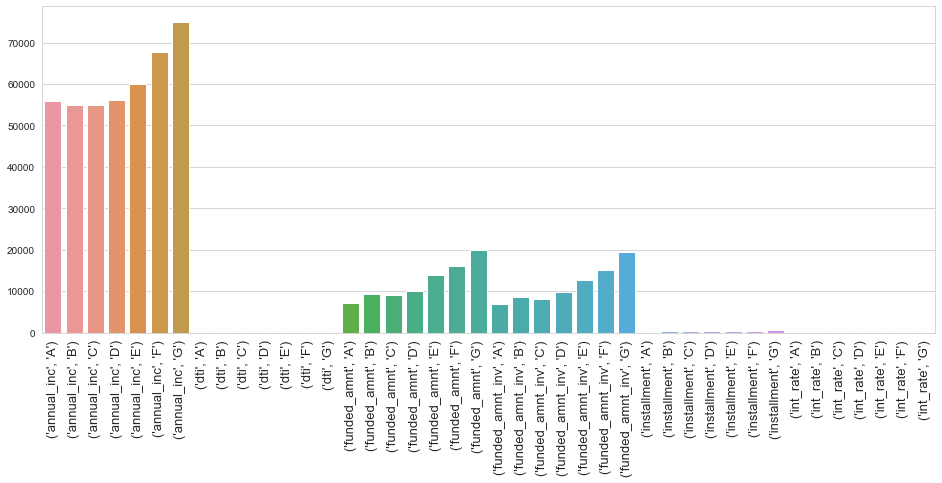

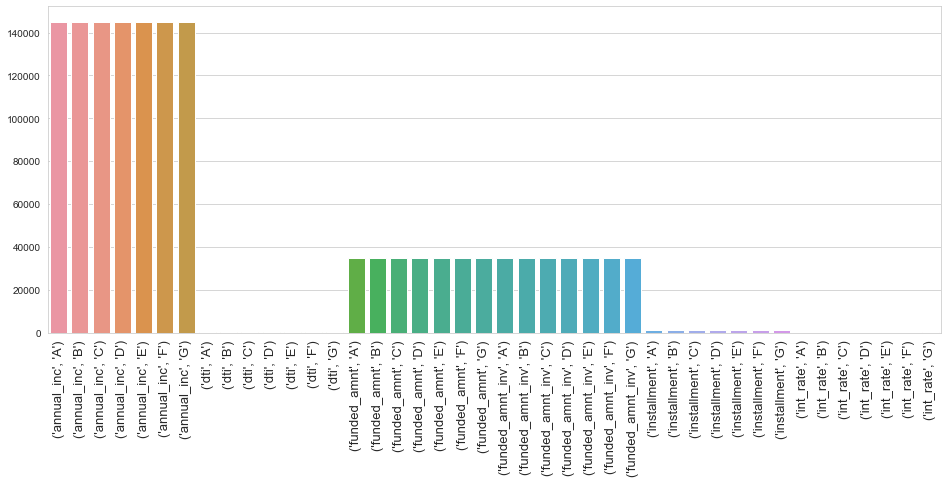

In [44]:
# 3.3 50th percentile of each category

fig = plt.figure(figsize=(16,6))
df = loan_df.pivot_table(index=['grade'],columns='grade', aggfunc =lambda x: np.percentile(x, 50))
df = df[["annual_inc", "dti", "funded_amnt", "funded_amnt_inv", "installment", "int_rate"]]
sns.barplot(data=df)
plt.xticks(rotation=90, fontsize=13)
plt.show()


# 3.4 max comparison across categories

fig = plt.figure(figsize=(16,6))
df = loan_df.pivot_table(index=['grade'],columns='grade', aggfunc ='max')
df = df[["annual_inc", "dti", "funded_amnt", "funded_amnt_inv", "installment", "int_rate"]]
sns.barplot(data=df)
plt.xticks(rotation=90, fontsize=13)
plt.show()

## Analysis observations :- 
# the Mean is usefull summary function- for grade based segmented analysis 

#### 3. Bivariate Analysis

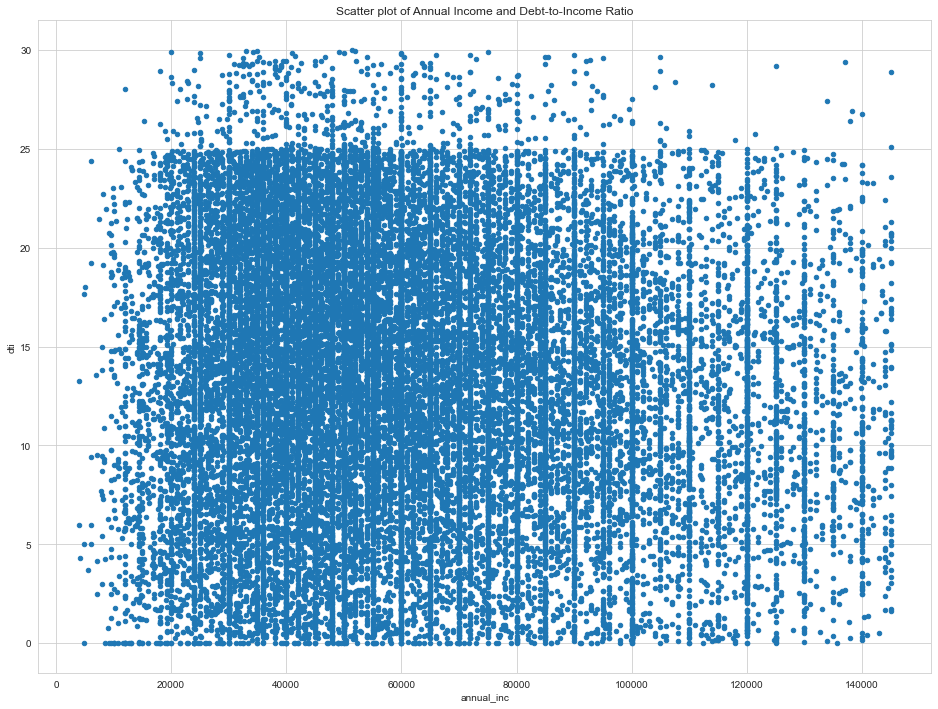

In [45]:
# Scatter plot of 'annual_inc' and 'dti'

loan_df.sample(30000).plot.scatter(x="annual_inc", y="dti", figsize=(16,12))
plt.xlabel("annual_inc")
plt.ylabel("dti")
plt.title("Scatter plot of Annual Income and Debt-to-Income Ratio")
plt.show()

Observation: The Debt-to-Income ratio for most of the loans are peaked at around 25. 

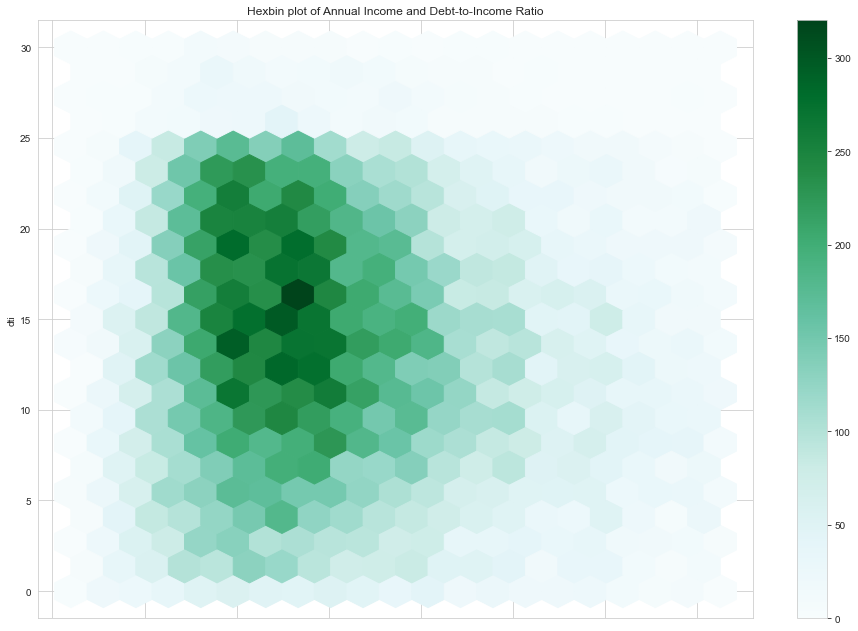

In [46]:
# Hexbin plot of 'annual_inc' and 'dti'

loan_df.plot.hexbin(x='annual_inc', y='dti', gridsize=20, figsize=(16,11))
plt.xlabel("annual_inc")
plt.ylabel("dti")
plt.title("Hexbin plot of Annual Income and Debt-to-Income Ratio")
plt.show()

Observation: The Annual Income to DTI correlation has a high density with DTI = 16 and Annual Income of 15000.

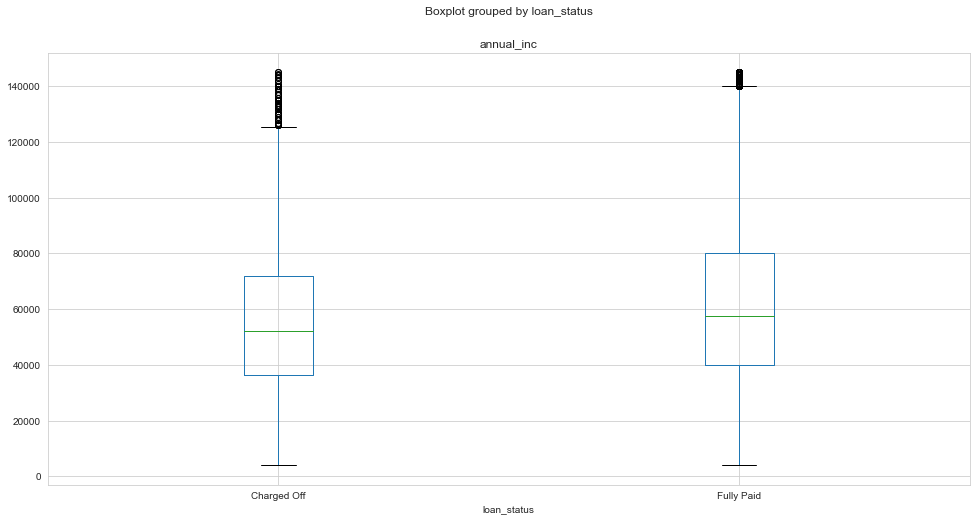

In [47]:
# Bivariate analysis (Categorical) using box plots of 'annual_inc' grouped by 'loan_status'

loan_df.boxplot(column="annual_inc",        # Column to plot
                 by= "loan_status",         # Column to split upon
                 figsize= (16,8))           # Figure size
plt.show()

Observation: The non-default loans has higher Annual Income that the one who are defaulted.

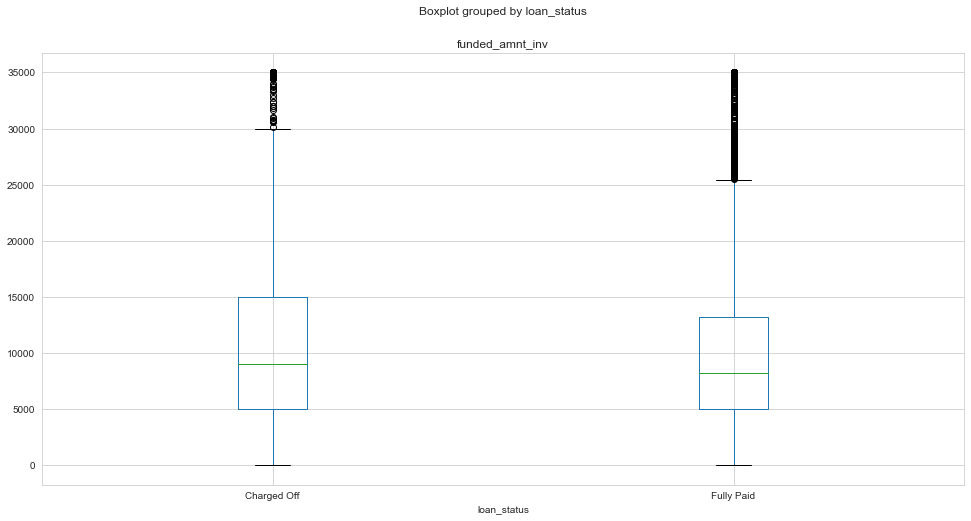

In [48]:
# Bivariate analysis (Categorical) using box plots of 'funded_amnt_inv' grouped by 'loan_status'

loan_df.boxplot(column="funded_amnt_inv",        # Column to plot
                 by= "loan_status",         # Column to split upon
                 figsize= (16,8))           # Figure size

plt.show()

Observation: The defaulted loans are typically with higher amounts.

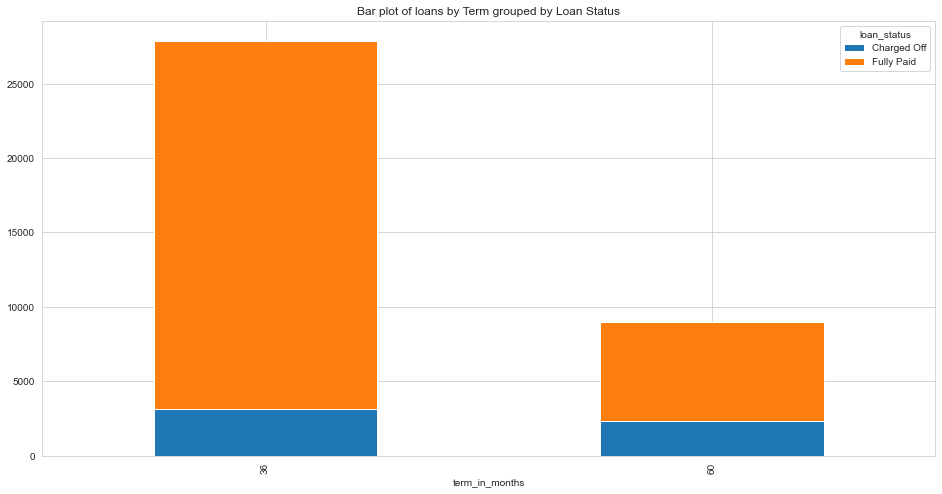

In [49]:
# Bivariate analysis (Categorical) using bar charts of 'term' grouped by 'loan_status'

term_default_table = pd.crosstab(index=loan_df["term_in_months"], 
                          columns=loan_df["loan_status"])
term_default_table
term_default_table.plot(kind="bar", 
             figsize=(16,8),
             stacked=True)
plt.title("Bar plot of loans by Term grouped by Loan Status")
plt.show()

Observation: Higher percentage of loans are defaulted which has 60 months term.

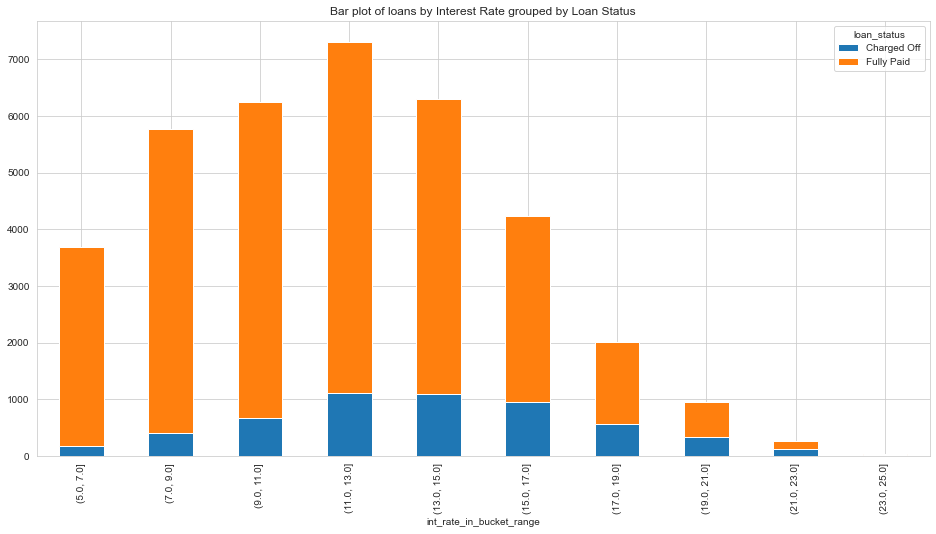

In [50]:
# Bivariate analysis (Categorical) using bar charts of 'int_rate' grouped by 'loan_status'

int_rate_default_table = pd.crosstab(index=loan_df["int_rate_in_bucket_range"], 
                          columns=loan_df["loan_status"])

int_rate_default_table
int_rate_default_table.plot(kind="bar", 
             figsize=(16,8),
             stacked=True)
plt.title("Bar plot of loans by Interest Rate grouped by Loan Status")
plt.show()

Observation: The loans with interest rate between 13% and 15% are more likely to be defaulted. 

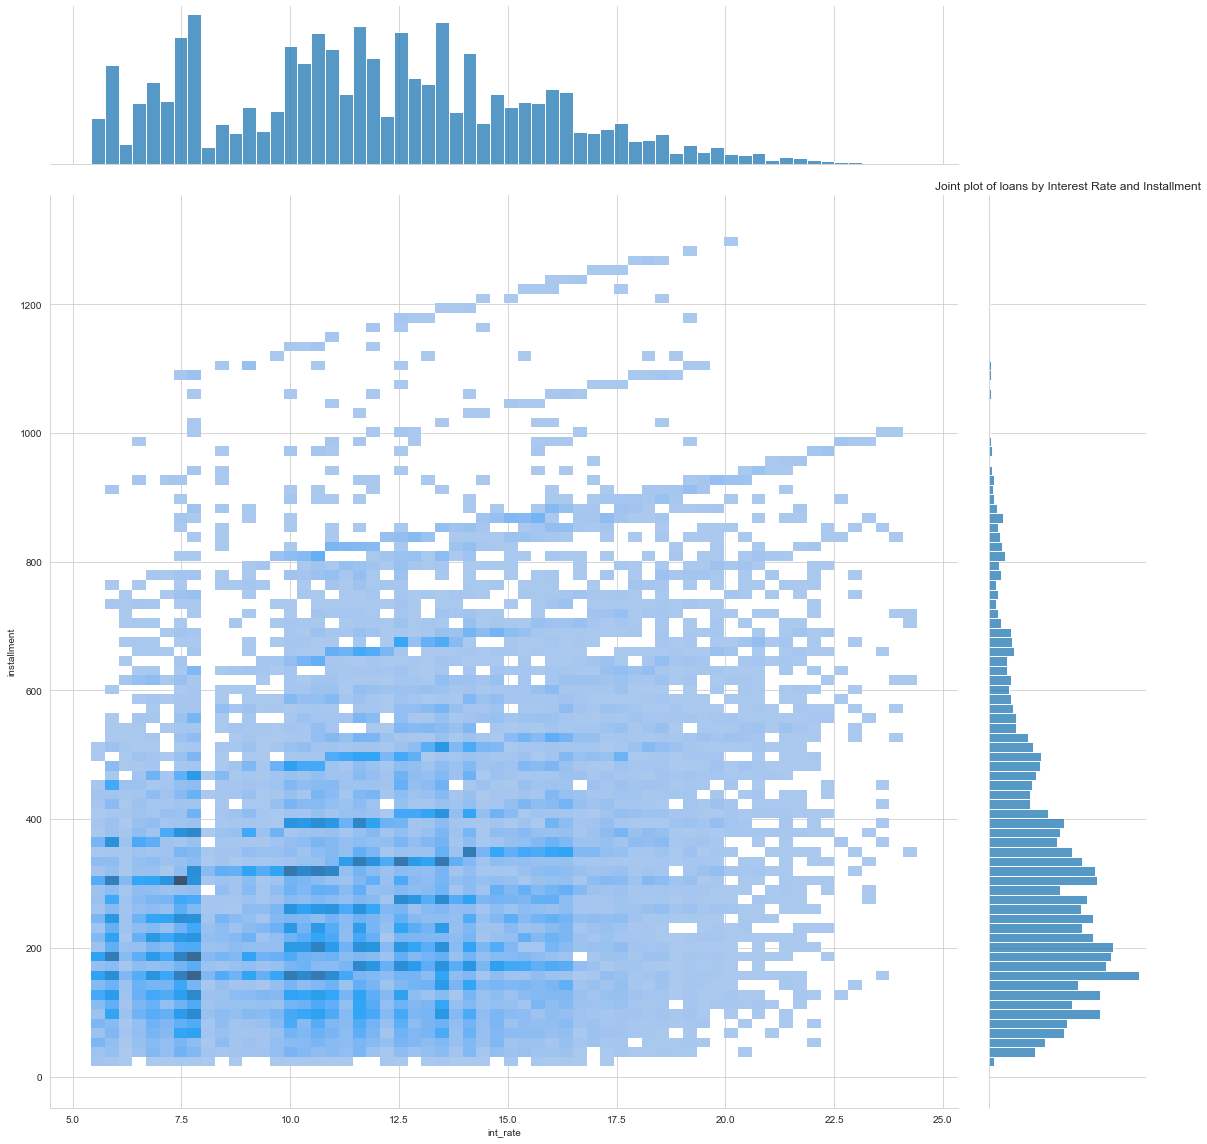

In [51]:
# Joint Plot of Interest Rate and Installment

sns.jointplot(data=loan_df, x="int_rate", y="installment", kind="hist", height=16)
plt.title("Joint plot of loans by Interest Rate and Installment")
plt.show()

Observation: The loans with installment and interest rate at lower side are more likely to be funded.

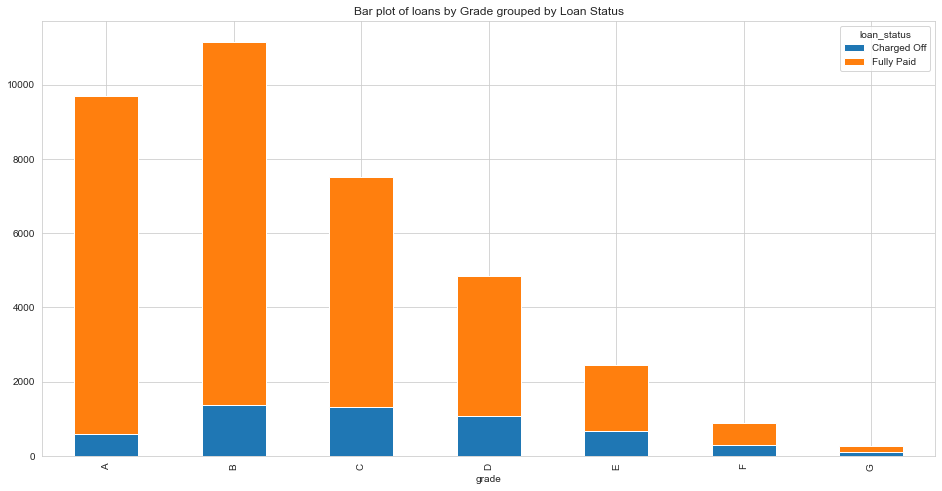

In [52]:
# Bivariate analysis (Categorical) using bar charts of 'grade' grouped by 'loan_status'

grade_default_table = pd.crosstab(index=loan_df["grade"], 
                          columns=loan_df["loan_status"])

grade_default_table
grade_default_table.plot(kind="bar", 
             figsize=(16,8),
             stacked=True)
plt.title("Bar plot of loans by Grade grouped by Loan Status")
plt.show()

Observation: The loans with grade 'C', 'D' and 'E' are more likely to be defaulted. 

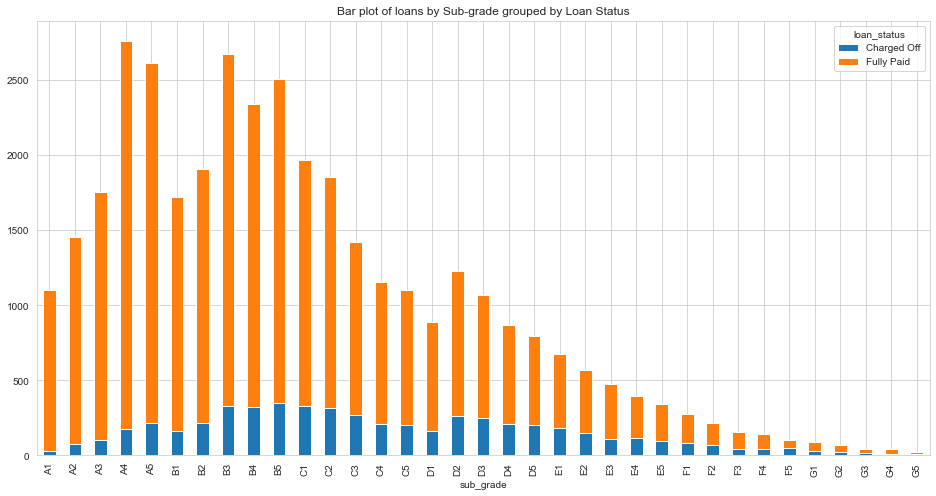

In [53]:
# Bivariate analysis (Categorical) using bar charts of 'sub_grade' grouped by 'loan_status'

sub_grade_default_table = pd.crosstab(index=loan_df["sub_grade"], 
                          columns=loan_df["loan_status"])

sub_grade_default_table
sub_grade_default_table.plot(kind="bar", 
             figsize=(16,8),
             stacked=True)
plt.title("Bar plot of loans by Sub-grade grouped by Loan Status")
plt.show()

Observation: The loans with sub-grade 'E1', 'E2', 'D2', 'D3', 'C3', 'C4' and 'C5' are more likely to be defaulted.

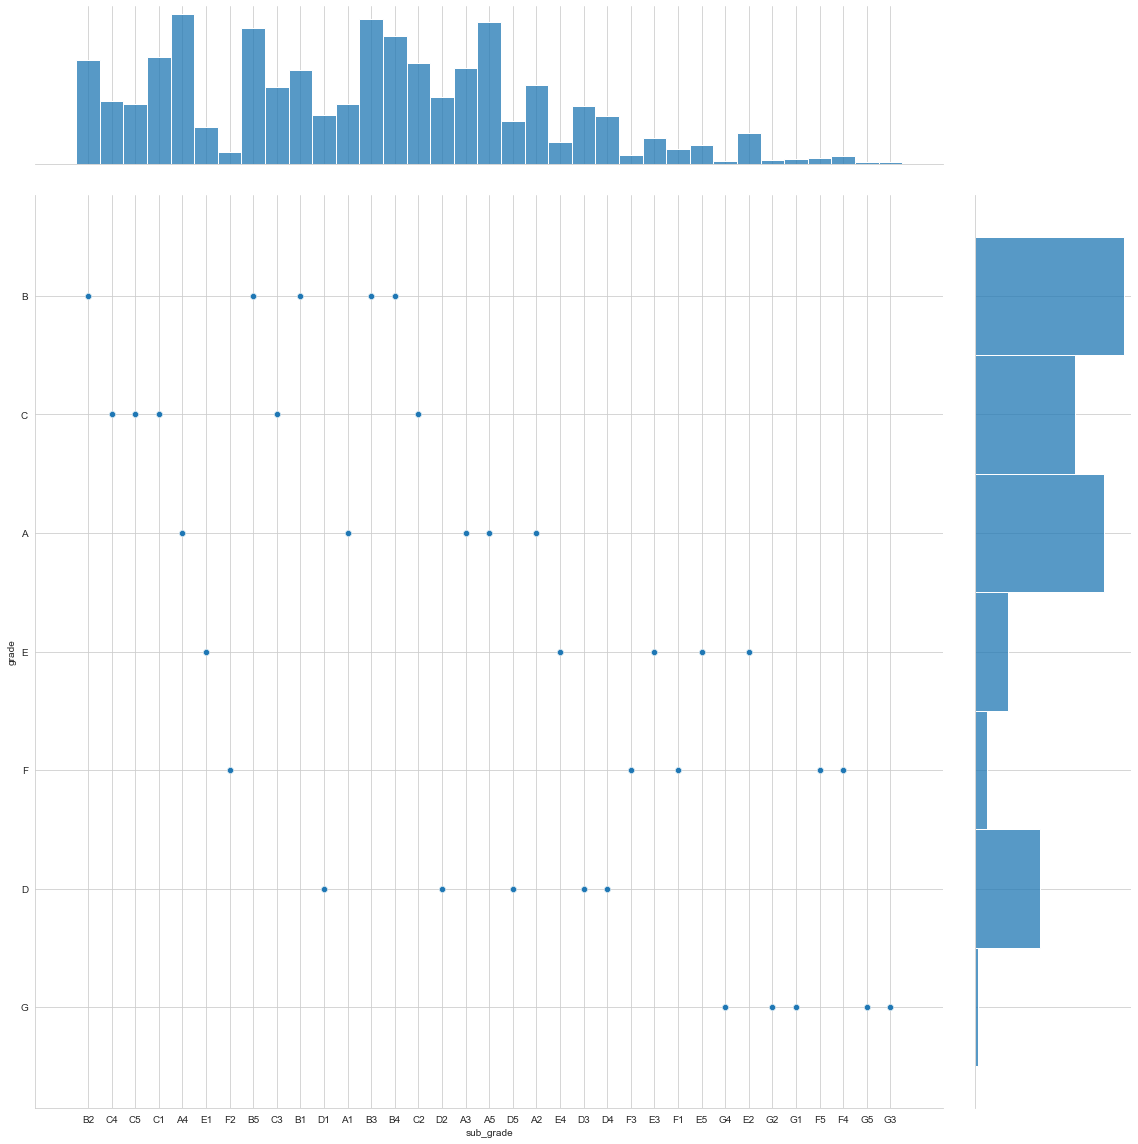

In [54]:
# Joint Plot of grade and Sub-grade 

sns.jointplot(data=loan_df, x="sub_grade", y="grade", height=16)
plt.xticks(rotation=90)
plt.show()

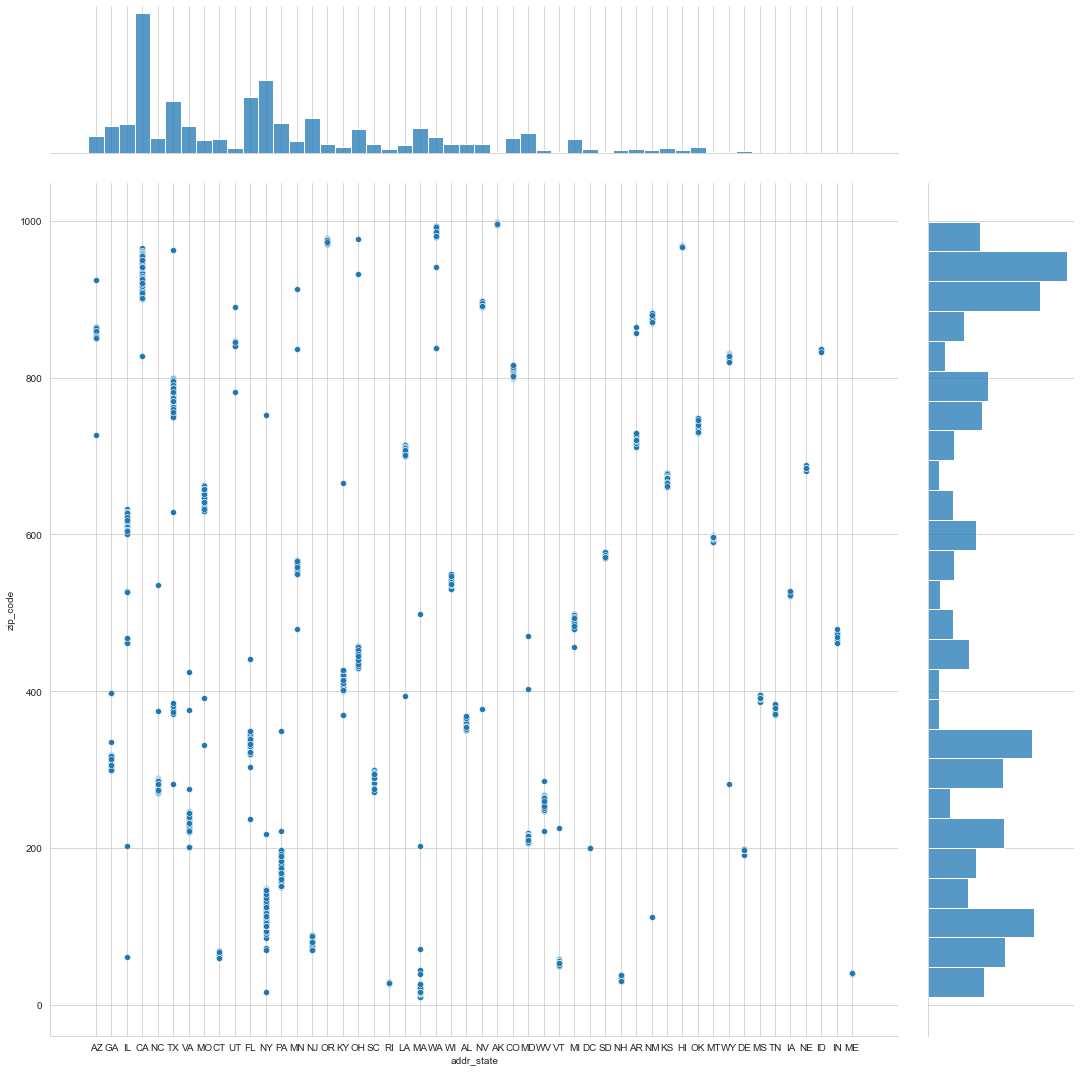

In [55]:
# Joint Plot of Address State and Zip Code

sns.jointplot(data=loan_df, x="addr_state", y="zip_code", height=15)
plt.xticks(rotation=90)
plt.show()

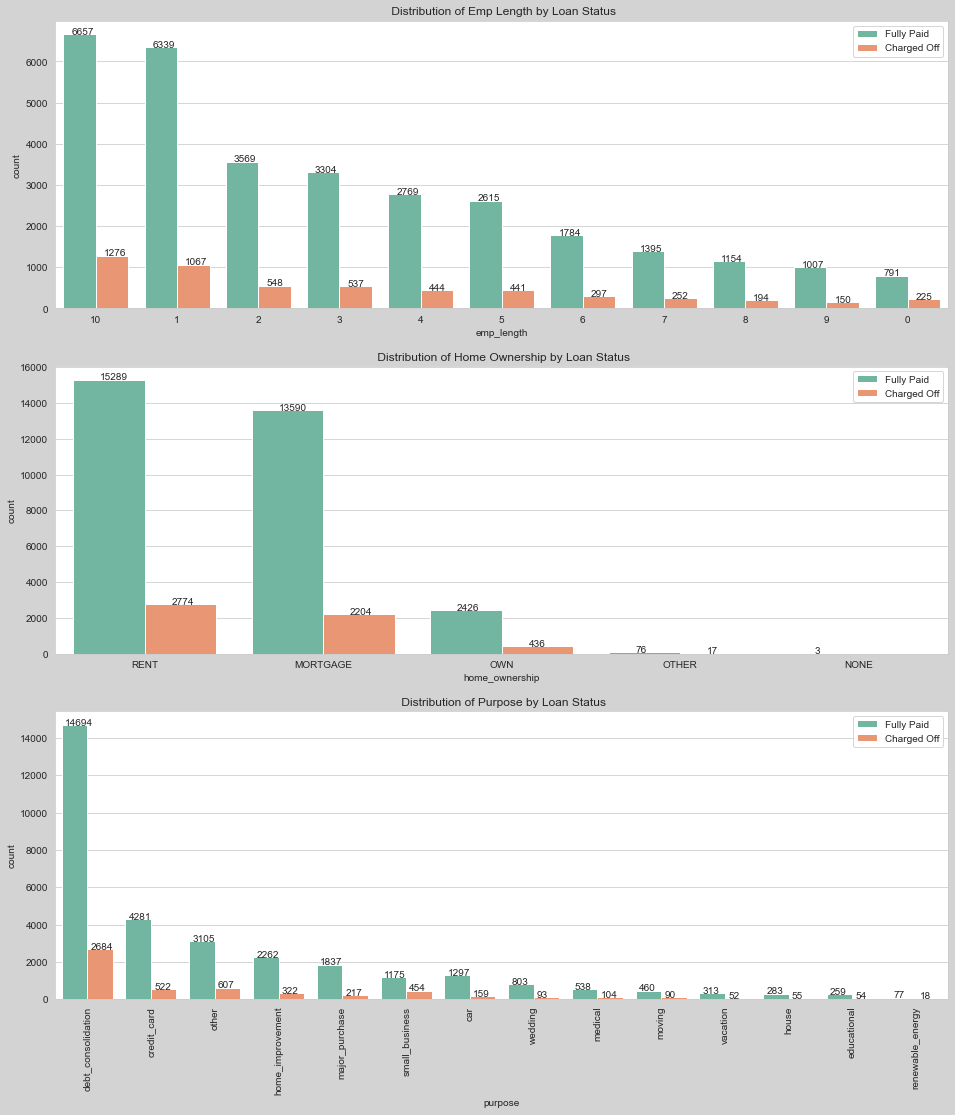

In [56]:
# Distribution of 'emp_length', home_ownership', 'purpose' by 'loan_status'

fig = plt.figure(figsize=(16,18))

plt.subplot(311)
a = sns.countplot(loan_df["emp_length"], 
                  order=loan_df["emp_length"].value_counts(ascending=False).index, 
                  palette="Set2",
                  hue=loan_df["loan_status"])

for p in a.patches: 
    a.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+.01)) 

plt.legend(loc="upper right")
plt.title(" Distribution of Emp Length by Loan Status")

plt.subplot(312)
b = sns.countplot(loan_df["home_ownership"], 
                  order=loan_df["home_ownership"].value_counts(ascending=False).index, 
                  palette="Set2",
                  hue=loan_df["loan_status"])

for p in b.patches: 
    b.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.15, p.get_height()+.01)) 

plt.legend(loc="upper right")
plt.title(" Distribution of Home Ownership by Loan Status")

plt.subplot(313)
c = sns.countplot(loan_df["purpose"], 
                  order=loan_df["purpose"].value_counts(ascending=False).index, 
                  palette="Set2",
                  hue=loan_df["loan_status"])

for p in c.patches: 
    c.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.05, p.get_height()+.01)) 

plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.title(" Distribution of Purpose by Loan Status")

fig.set_facecolor("lightgray")

Observations:
1. The loans taken by borrowers with experience of 10 or more years, followed by borrowers with experience of 1 year or lower are more likely to be defaulted.
2. The loans taken by borrowers having the home rented or mortgaged have defaulted more.
3. The loans taken by borrowers for Debt Reconciliation have defaulted more.

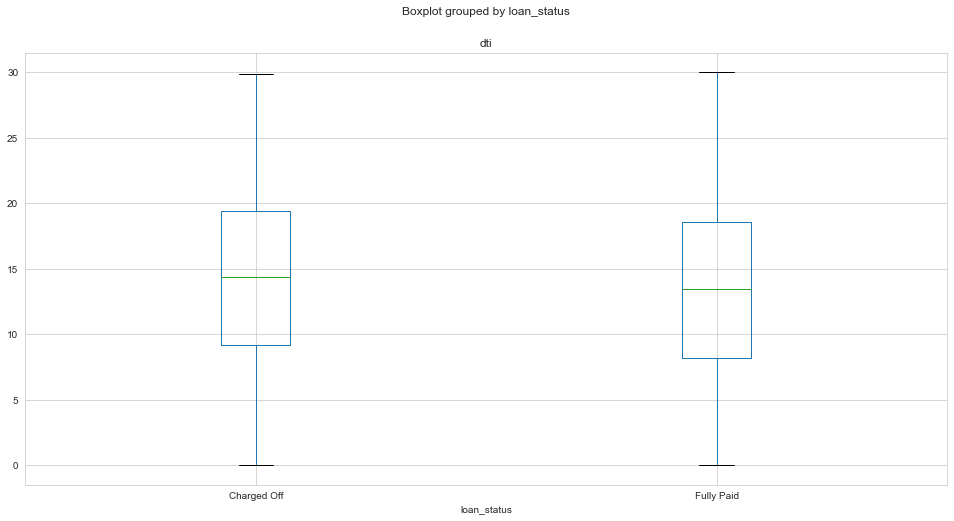

In [57]:
# 10. Bivariate analysis (Categorical) using box plots of 'dti' grouped by 'loan_status'

loan_df.boxplot(column="dti",               # Column to plot
                 by= "loan_status",         # Column to split upon
                 figsize= (16,8))           # Figure size

plt.show()

Observation: The loan borrowers with lower Debt-to-Income ratio are more likely to be non-defaulter.

----
#### 4. Derived Metrics

###### 1. Type Driven Metrics

loan_status      Charged Off  Fully Paid  charge_off_per  fully_paid
loan_issue_year                                                     
2007                      42         189       18.181818   81.818182
2008                     237        1257       15.863454   84.136546
2009                     568        3929       12.630643   87.369357
2010                    1432        9629       12.946388   87.053612
2011                    3152       16380       16.137620   83.862380


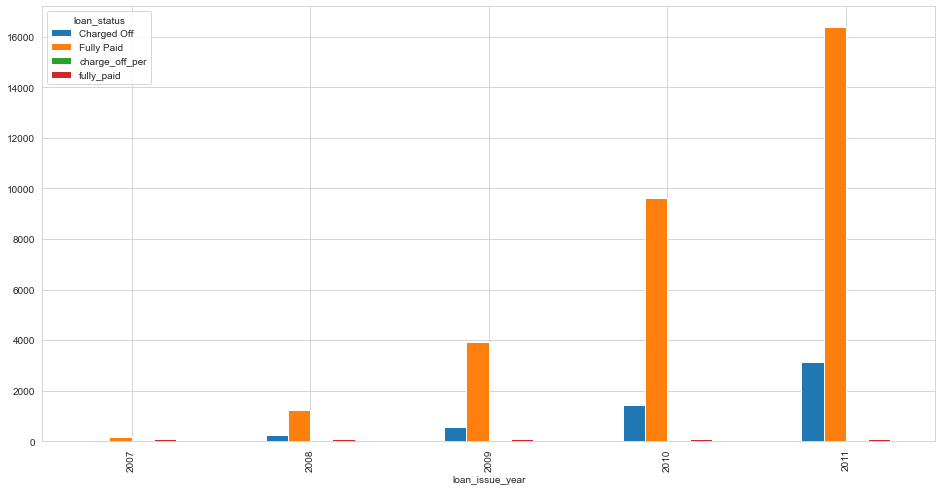

In [58]:
# Type Driven Metrics
# variable used - loan_issue_date
# newly created variable is loan_issue_year
# can be used in comparison with loan_status for analysing number of charged off applications year wise 
# E.g. A perticular year with high defaulters can be found so by general knowladge we can find the reason for it.

loan_df['loan_issue_year'] = pd.DatetimeIndex(loan_df['loan_issue_date']).year  # new column created

# Bivariate analysis (Categorical) using bar charts of 'loan_issue_year' grouped by 'loan_status'


loan_issue_default_table = pd.crosstab(index=loan_df["loan_issue_year"], 
                          columns=loan_df["loan_status"])

loan_issue_default_table["charge_off_per"] = (loan_issue_default_table["Charged Off"] / (loan_issue_default_table["Charged Off"]+loan_issue_default_table["Fully Paid"]))*100
loan_issue_default_table["fully_paid"] = (loan_issue_default_table["Fully Paid"] / (loan_issue_default_table["Charged Off"]+loan_issue_default_table["Fully Paid"]))*100
print(loan_issue_default_table)

loan_issue_default_table.plot(kind="bar", 
             figsize=(16,8))
plt.show()


## Analysis observations :- 
# The year 2007 is having less number of loan applicants but have high number of defaulters, 
# this year we can mark it as red and by doing some research we can find out the reason for high defaulters in that year like
# was there any panademic happened in that year so in future it will be helpful for decreasing risk for defaulters

###### 2. Business Driven Metrics

loan_status                 Charged Off  Fully Paid  charge_off_per  \
is_funded_amnt_by_inv_same                                            
no                                 2746       15396       15.136148   
yes                                2685       15988       14.379050   

loan_status                 fully_paid  
is_funded_amnt_by_inv_same              
no                           84.863852  
yes                          85.620950  


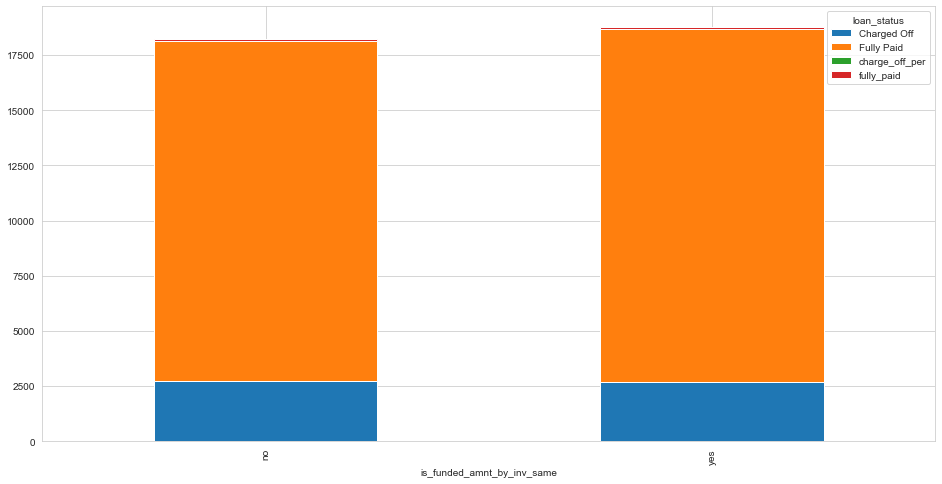

In [59]:
# Business Driven Metrics
# variables used -- funded_amnt and funded_amnt_inv
# newly created variable is is_funded_amnt_by_inv_same (values --> 'yes' and 'no')
# can be used in comparison with loan_status for analysing weather there is any impact of amount funding on defaulters

loan_df["is_funded_amnt_by_inv_same"] = loan_df["funded_amnt"] - loan_df["funded_amnt_inv"]
loan_df["is_funded_amnt_by_inv_same"]  = loan_df["is_funded_amnt_by_inv_same"].apply(lambda x: 'yes' if x == 0 else 'no')

# Bivariate analysis (Categorical) using bar charts of 'loan_issue_year' grouped by 'loan_status'

Is_fund_amnt_same_table = pd.crosstab(index=loan_df["is_funded_amnt_by_inv_same"], 
                          columns=loan_df["loan_status"])

Is_fund_amnt_same_table["charge_off_per"] = (Is_fund_amnt_same_table["Charged Off"] / (Is_fund_amnt_same_table["Charged Off"]+Is_fund_amnt_same_table["Fully Paid"]))*100
Is_fund_amnt_same_table["fully_paid"] = (Is_fund_amnt_same_table["Fully Paid"] / (Is_fund_amnt_same_table["Charged Off"]+Is_fund_amnt_same_table["Fully Paid"]))*100
print(Is_fund_amnt_same_table)

Is_fund_amnt_same_table.plot(kind="bar", 
             figsize=(16,8),
             stacked=True)
plt.show()

## Analysis observations :- 
# There is no impact of diffrence between funding amount and funding amount by investors on defaulters

##### 3. Data Driven Metrics

0.4038513317755205
-0.0750999150176587
-0.0750999150176587
-0.0750999150176587


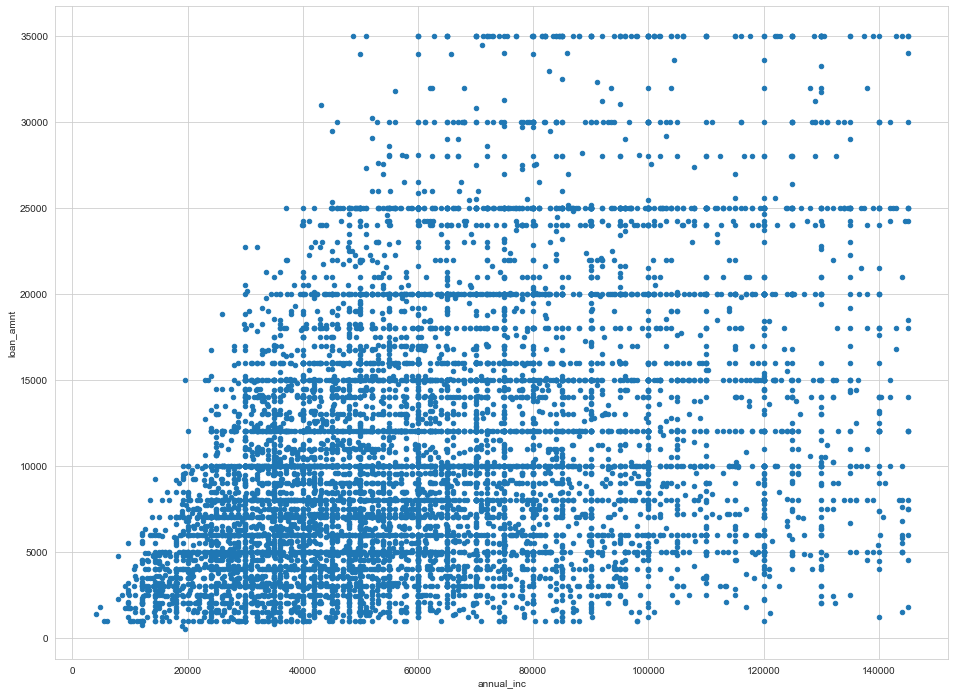

In [60]:
# DataDriven Metrics
# Understanding Correlation between different pairs of variables

correlation = loan_df['loan_amnt'].corr(loan_df['annual_inc'])
print(correlation)

correlation = loan_df['dti'].corr(loan_df['annual_inc'])
print(correlation)

correlation1 = loan_df['int_rate'].corr(loan_df['annual_inc'])
print(correlation)

correlation1 = loan_df['installment'].corr(loan_df['annual_inc'])
print(correlation)

# The loan_amnt and annual_inc found highly correlated variables from the data we cleaned up hence
# plotting a scatter plot for understanding its distribution

loan_df.sample(10000).plot.scatter(x="annual_inc", y="loan_amnt", figsize=(16,12))
plt.show()

## Analysis observations :- 
# Data driven approach for this dataframe may not be the accurate option for analysis as it has only one pair of variable that is 
# highly correlated and talso not giving enogh information regarding defaulters.


### Driver Variables

1. dti (Debt-to-Income ratio)
2. purpose (Purpose of the loan)
3. home_ownership (Home Ownership Status)
4. emp_length (Employment Length)
5. term (Term)

### Recommendations:

1. Reject loans of loan applicants with dti (Debt-to-Income) ratio > 18.
2. Reject the loans for loan applicants having purpose of 'For Debt Reconciliation'. Also reduce the loan amount for loan applicants having purpose of 'Credit Card'.
3. Increase the Interest Rate for loan applicants with home ownership status as 'Rented' or 'Mortgaged' as the risk of lending is higher.
4. Verify the income sources and dti before granting the loans to the loan applicants with experience of 10 years or more and with experience of 1 year and less.
5. The loans funded for higher terms are more likely to get defaulted, hence keep the interest rate on higher side to cover the risk.